In [257]:
# Model 8- ELI & ROS
# Install all the required libraries 
!pip install xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PooledOLS
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

In [258]:
#Import the file for analysis
excel_file='Final_For ELI & analysis2.xlsx'
csv_file='for_eli.csv'
df=pd.read_excel(excel_file)
df.to_csv(csv_file, index=False)

In [259]:
# Check the number of rows and type of data
df

PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory      Firmsize  ...  Financial_leverage  Liquidity  \
0          5.908500e+06  3.195300e+07  ...            0.460896   1.602492   
1          5.622000e+06  3.330800e+07  ...            0.503933   1.765856   
2          5.243500e+06  3.129600e+07  ...            0.401169   1.338426   
3          4.901500e+06  2.971500e+07  ...            0.338449   1.366509   
4          4.683500e+06  2.884800e+07  ...            0.319780   1.299099   
...                 ...           ...  ...                 ...        ...   
6006       2.188609e+03  1.046680e+04  ...            0.049356   1.973843   
6007       2.471450e+03  1.052359e+04  ...            0.072644   1.811557   
6008       2.715799e+03  1.174810e+04  ...            0.134726   1.681820   
6009       2.991336e+03  1.237541e+04  ...            0.190395   1.716791   
6010       3.312689e+03  1.173277e+04  ...            0.267047   1.624776   

      Capital_intensity  Firm_growth  Short_term_financing  Asset_tangibility  \
0              2.562672     0.083475              0.223516           0.641818   
1              2.748639    -0.390899              0.195028           0.655608   
2              1.581087     0.046766              0.223767           0.700505   
3              1.588623     0.017555              0.214033           0.707521   
4              1.581208     0.158110              0.230865           0.700083   
...                 ...          ...                   ...                ...   
6006           0.414362    -0.141636              0.401610           0.207285   
6007           0.377385    -0.191525              0.449404           0.185880   
6008           0.330475     0.026884              0.510204           0.141929   
6009           0.339144     0.032542              0.513190           0.118961   
6010           0.349832    -0.226081              0.528886           0.140678   

      Date of incorporation  Firm_age_  Average_fixed_assets  log_fasset  
0                21/10/1886        138          1.892600e+07    7.277059  
1                21/10/1886        137          1.892600e+07    7.277059  
2                21/10/1886        136          1.892600e+07    7.277059  
3                21/10/1886        135          1.892600e+07    7.277059  
4                21/10/1886

In [260]:
# CHeck the descriptive statistics
df.describe()

PrimaryUKSIC2007code   Unique code       Index1          ccc  \
count           6011.000000  6.011000e+03  6011.000000  5941.000000   
mean           21835.321910  2.218500e+07     5.500749    87.268762   
std             8153.497473  1.705788e+08     2.872868   106.722121   
min             8120.000000  1.100000e+01     1.000000   -79.111117   
25%            16100.000000  2.200000e+01     3.000000    41.123182   
50%            22290.000000  5.200000e+01     6.000000    70.275435   
75%            28220.000000  7.200000e+01     8.000000   105.156783   
max            46900.000000  1.333537e+09    10.000000  1989.505993   

       No. of employees      Turnover  Average inventory      Firmsize  \
count       6011.000000  6.011000e+03       6.011000e+03  6.011000e+03   
mean         808.602229  2.131982e+05       3.956926e+04  3.702343e+05   
std         5377.975125  1.662658e+06       3.362357e+05  3.544926e+06   
min            3.000000  3.391782e+03       1.045720e+02  1.881905e+03   
25%          112.000000  1.603978e+04       1.174202e+03  1.020178e+04   
50%          179.000000  2.582000e+04       2.564000e+03  1.708300e+04   
75%          309.000000  5.171080e+04       5.460364e+03  3.486525e+04   
max       101192.000000  3.411400e+07       5.971500e+06  8.043100e+07   

        log_Tasset          ROA  ...  Inventory_to_saleratio  \
count  6011.000000  6011.000000  ...             6011.000000   
mean      4.379554     5.382080  ...                0.121120   
std       0.599165     8.034841  ...                0.145782   
min       3.274598   -80.870268  ...                0.004676   
25%       4.008676     1.682199  ...                0.053838   
50%       4.232564     4.796452  ...                0.093647   
75%       4.542393     8.834691  ...                0.148332   
max       7.905423    63.773807  ...                2.310598   

       Financial_leverage    Liquidity  Capital_intensity  Firm_growth  \
count         6011.000000  6011.000000        6011.000000  6011.000000   
mean             0.261798     1.748246           0.808001     0.064578   
std              0.194733     1.297759           0.810378     0.205036   
min              0.000759     0.075631           0.146988    -0.784855   
25%              0.114256     1.096934           0.488921    -0.025924   
50%              0.226090     1.440554           0.636324     0.049540   
75%              0.372368     1.991514           0.869706     0.135355   
max              1.958235    23.718448          14.802047     4.093515   

       Short_term_financing  Asset_tangibility    Firm_age_  \
count           6011.000000        6011.000000  6011.000000   
mean               0.427383           0.384394    35.171852   
std                0.181229           0.188969    25.726682   
min                0.031133           0.000731     1.000000   
25%                0.297980           0.238107    17.000000   
50%                0.411233           0.373406    29.000000   
75%                0.547365           0.513404    44.000000   
max                1.366549           0.946401   138.000000   

       Average_fixed_assets   log_fasset  
count          6.011000e+03  6011.000000  
mean           2.342587e+05     3.920703  
std            2.401786e+06     0.701197  
min            1.366000e+02     2.135451  
25%            3.273000e+03     3.514946  
50%            6.212008e+03     3.793232  
75%            1.423181e+04     4.153260  
max            4.211530e+07     7.624440  

[8 rows x 23 columns]

In [261]:
# Check the number of rows and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    6011 non-null   int64  
 1   Unique code             6011 non-null   int64  
 2   Company_name            6011 non-null   object 
 3   BvDIDnumber             6011 non-null   object 
 4   Index1                  6011 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        6011 non-null   int64  
 7   Turnover                6011 non-null   float64
 8   Average inventory       6011 non-null   float64
 9   Firmsize                6011 non-null   float64
 10  log_Tasset              6011 non-null   float64
 11  ROA                     6011 non-null   float64
 12  ROS                     6011 non-null   float64
 13  Profit                  6011 non-null   float64
 14  Inventory_turnover      6011 non-null   

In [262]:
# Generate the ELI
# Log tranform the Turnover & avg Inventory to run OLS regression

df['log_turnover']=np.log(df['Turnover'])
df['log_average_inventory']=np.log(df['Average inventory'])
df['log_employees']=np.log(df['No. of employees'])

In [263]:
df.describe()

PrimaryUKSIC2007code   Unique code       Index1          ccc  \
count           6011.000000  6.011000e+03  6011.000000  5941.000000   
mean           21835.321910  2.218500e+07     5.500749    87.268762   
std             8153.497473  1.705788e+08     2.872868   106.722121   
min             8120.000000  1.100000e+01     1.000000   -79.111117   
25%            16100.000000  2.200000e+01     3.000000    41.123182   
50%            22290.000000  5.200000e+01     6.000000    70.275435   
75%            28220.000000  7.200000e+01     8.000000   105.156783   
max            46900.000000  1.333537e+09    10.000000  1989.505993   

       No. of employees      Turnover  Average inventory      Firmsize  \
count       6011.000000  6.011000e+03       6.011000e+03  6.011000e+03   
mean         808.602229  2.131982e+05       3.956926e+04  3.702343e+05   
std         5377.975125  1.662658e+06       3.362357e+05  3.544926e+06   
min            3.000000  3.391782e+03       1.045720e+02  1.881905e+03   
25%          112.000000  1.603978e+04       1.174202e+03  1.020178e+04   
50%          179.000000  2.582000e+04       2.564000e+03  1.708300e+04   
75%          309.000000  5.171080e+04       5.460364e+03  3.486525e+04   
max       101192.000000  3.411400e+07       5.971500e+06  8.043100e+07   

        log_Tasset          ROA  ...  Capital_intensity  Firm_growth  \
count  6011.000000  6011.000000  ...        6011.000000  6011.000000   
mean      4.379554     5.382080  ...           0.808001     0.064578   
std       0.599165     8.034841  ...           0.810378     0.205036   
min       3.274598   -80.870268  ...           0.146988    -0.784855   
25%       4.008676     1.682199  ...           0.488921    -0.025924   
50%       4.232564     4.796452  ...           0.636324     0.049540   
75%       4.542393     8.834691  ...           0.869706     0.135355   
max       7.905423    63.773807  ...          14.802047     4.093515   

       Short_term_financing  Asset_tangibility    Firm_age_  \
count           6011.000000        6011.000000  6011.000000   
mean               0.427383           0.384394    35.171852   
std                0.181229           0.188969    25.726682   
min                0.031133           0.000731     1.000000   
25%                0.297980           0.238107    17.000000   
50%                0.411233           0.373406    29.000000   
75%                0.547365           0.513404    44.000000   
max                1.366549           0.946401   138.000000   

       Average_fixed_assets   log_fasset  log_turnover  log_average_inventory  \
count          6.011000e+03  6011.000000   6011.000000            6011.000000   
mean           2.342587e+05     3.920703     10.453095               8.001109   
std            2.401786e+06     0.701197      1.182685               1.474724   
min            1.366000e+02     2.135451      8.129111               4.649876   
25%            3.273000e+03     3.514946      9.682827               7.068344   
50%            6.212008e+03     3.793232     10.158905               7.849324   
75%            1.423181e+04     4.153260     10.853422               8.605271   
max            4.211530e+07     7.624440     17.345218              15.602509   

       log_employees  
count    6011.000000  
mean        5.348475  
std         1.067520  
min         1.098612  
25%         4.718499  
50%         5.187386  
75%         5.733341  
max        11.524775  

[8 rows x 26 columns]

In [264]:



# Winsorise the data to remove outliers 
# Name a variable to store the columns to be winsorised
cols_to_winsorize = ['log_employees','log_turnover','log_average_inventory','Firmsize', 
                     'log_Tasset', 'ROA', 'ROS', 'Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets', 
                     'log_fasset']

#Loop the columns to winsorise
for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Print the dataframe to check the result
df


PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory    Firmsize  ...  Firm_growth  Short_term_financing  \
0          5.908500e+06  351813.000  ...     0.083475              0.223516   
1          5.622000e+06  351813.000  ...    -0.196410              0.195028   
2          5.243500e+06  351813.000  ...     0.046766              0.223767   
3          4.901500e+06  351813.000  ...     0.017555              0.214033   
4          4.683500e+06  351813.000  ...     0.158110              0.230865   
...                 ...         ...  ...          ...                   ...   
6006       2.188609e+03   10466.801  ...    -0.141636              0.401610   
6007       2.471450e+03   10523.595  ...    -0.191525              0.449404   
6008       2.715799e+03   11748.096  ...     0.026884              0.510204   
6009       2.991336e+03   12375.407  ...     0.032542              0.513190   
6010       3.312689e+03   11732.771  ...    -0.196410              0.528886   

      Asset_tangibility  Date of incorporation  Firm_age_  \
0              0.641818             21/10/1886        138   
1              0.655608             21/10/1886        137   
2              0.700505             21/10/1886        136   
3              0.707521             21/10/1886        135   
4              0.700083             21/10/1886        134   
...                 ...                    ...        ...   
6006           0.207285                  40256          6   
6007           0.185880                  40256          5   
6008           0.141929                  40256          4   
6009           0.118961                  40256          3   
6010           0.140678                  40256          2   

      Average_fixed_assets  log_fasset  log_turnover  log_average_inventory  \
0              172286.8000    5.236252     12.749019              10.569212   
1              172286.8000    5.236252     12.749019              10.569212   
2              172286.8000    5.236252     12.749019              10.569212   
3              172286.8000    5.236252     12.749019              10.569212   
4              172286.8000    5.236252     12.749019              10.569212   
...                    ...         ...           ...                    ...   
6006             2106.1912    3.323498     10.139688             

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    6011 non-null   int64  
 1   Unique code             6011 non-null   int64  
 2   Company_name            6011 non-null   object 
 3   BvDIDnumber             6011 non-null   object 
 4   Index1                  6011 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        6011 non-null   int64  
 7   Turnover                6011 non-null   float64
 8   Average inventory       6011 non-null   float64
 9   Firmsize                6011 non-null   float64
 10  log_Tasset              6011 non-null   float64
 11  ROA                     6011 non-null   float64
 12  ROS                     6011 non-null   float64
 13  Profit                  6011 non-null   float64
 14  Inventory_turnover      6011 non-null   

In [267]:
# Store variables to include
var=['PrimaryUKSIC2007code','Company_name','BvDIDnumber','Index1','log_turnover','log_average_inventory']
df_eli=df[var]

In [268]:
df_eli.describe()

PrimaryUKSIC2007code       Index1  log_turnover  log_average_inventory
count           6011.000000  6011.000000   6011.000000            6011.000000
mean           21835.321910     5.500749     10.397416               7.932921
std             8153.497473     2.872868      0.956337               1.184078
min             8120.000000     1.000000      9.205514               6.080334
25%            16100.000000     3.000000      9.682827               7.068344
50%            22290.000000     6.000000     10.158905               7.849324
75%            28220.000000     8.000000     10.853422               8.605271
max            46900.000000    10.000000     12.749019              10.569212

In [269]:
#Check Correlation
df_eli.corr()

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/1035014141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eli.corr()


PrimaryUKSIC2007code    Index1  log_turnover  \
PrimaryUKSIC2007code               1.000000  0.000121     -0.225679   
Index1                             0.000121  1.000000     -0.122424   
log_turnover                      -0.225679 -0.122424      1.000000   
log_average_inventory              0.009011 -0.149061      0.772999   

                       log_average_inventory  
PrimaryUKSIC2007code                0.009011  
Index1                             -0.149061  
log_turnover                        0.772999  
log_average_inventory               1.000000

In [270]:
# OLS regression between log inventory and log of avg inventory, Industry and time wise to get ELI

# Create an empty dataframe for company-level data
output_df = pd.DataFrame(columns=['Company_name', 'BvDIDnumber', 'PrimaryUKSIC2007code', 'Index1', 'R_squared', 'coef_TurnoverthGBP', 'residuals', 'studentized_residuals', 'ELI'])

# Create a dataframe for summary or results
summary_df = pd.DataFrame(columns=['PrimaryUKSIC2007code', 'Index1', 'R_squared', 'coef_TurnoverthGBP', 'p_value'])

# Loop over industries and years
for industry in df_eli['PrimaryUKSIC2007code'].unique():
    for year in df_eli['Index1'].unique():
        # Subset the data
        df_subset = df_eli[(df_eli['PrimaryUKSIC2007code'] == industry) & (df_eli['Index1'] == year)]
        
         # The firms having more than 4 firms only is accounted
        if len(df_subset) > 4:
            
            # Run the regression models to calculate ELI
            # Fit the model
            model = smf.ols(formula='log_turnover ~ log_average_inventory', data=df_subset)
            results = model.fit()

            # Calculate residuals
            residuals = results.resid

            # Calculate studentized residuals
            studentized_residuals = residuals / residuals.std(ddof=2)

            # Calculate ELI
            eli = -1 * studentized_residuals

            # Add company name, BvDIDnumber, industry, year, R-squared, coefficient of TurnoverthGBP, residuals, studentized_residuals, and ELI to the output_df
            for i in range(len(df_subset)):
                output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'], 
                                              'BvDIDnumber': df_subset.iloc[i]['BvDIDnumber'], 
                                              'PrimaryUKSIC2007code': industry, 
                                              'Index1': year, 
                                              'R_squared': results.rsquared, 
                                              'coef_TurnoverthGBP': results.params['log_average_inventory'],
                                              'residuals': residuals.iloc[i],
                                              'studentized_residuals': studentized_residuals.iloc[i],
                                              'ELI': eli.iloc[i]},
                                             ignore_index=True)
            
            # Add the values to the summary dataframe
            r_squared = results.rsquared
            coef = results.params['log_average_inventory']
            p_value = results.pvalues['log_average_inventory']
            
            summary_df = summary_df.append({'PrimaryUKSIC2007code': industry, 
                                            'Index1': year, 
                                            'R_squared': r_squared, 
                                            'coef_TurnoverthGBP': coef, 
                                            'p_value': p_value},
                                           ignore_index=True)
#Print the output of ELI and store it in Excel 
print(output_df)
print(summary_df)


/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is d

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is d

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is d

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is d

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'PrimaryUKSIC2007code': industry,
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is d

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({'Company_name': df_subset.iloc[i]['Company_name'],
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/867229595.py:32: FutureWarning: The frame.app

                                  Company_name BvDIDnumber  \
0                                   DIAGEO PLC  GB00023307   
1              THE MACALLAN DISTILLERS LIMITED  GBSC024068   
2                  THE EDRINGTON GROUP LIMITED  GBSC036374   
3         SPEYMALT WHISKY DISTRIBUTORS LIMITED  GBSC037522   
4     TOMATIN DISTILLERY COMPANY LIMITED,(THE)  GBSC095810   
...                                        ...         ...   
6006                     REFLEX LABELS LIMITED  GB03708517   
6007             THE BARCODE WAREHOUSE LIMITED  GB03842666   
6008                  THE REFLEX GROUP LIMITED  GB04341532   
6009                       MSO CLELAND LIMITED  GBNI015669   
6010                   GILMOUR & DEAN. LIMITED  GBSC024552   

     PrimaryUKSIC2007code Index1  R_squared  coef_TurnoverthGBP     residuals  \
0                   11010      1   0.336433            4.794779  5.290451e-01   
1                   11010      1   0.336433            4.794779  1.808192e-02   
2           

In [271]:
output_df.describe()

R_squared  coef_TurnoverthGBP     residuals  studentized_residuals  \
count  6011.000000         6011.000000  6.011000e+03           6.011000e+03   
mean      0.623405            0.660355  3.259560e-16           3.014280e-16   
std       0.217826            0.379617  4.486817e-01           9.131139e-01   
min       0.003781           -0.181501 -2.304721e+00          -2.680274e+00   
25%       0.507608            0.517765 -2.838475e-01          -6.627724e-01   
50%       0.632465            0.616588  5.175870e-03           1.432903e-02   
75%       0.786606            0.731357  2.570245e-01           5.978074e-01   
max       0.996047            4.794779  1.684741e+00           3.691258e+00   

                ELI  
count  6.011000e+03  
mean  -3.014280e-16  
std    9.131139e-01  
min   -3.691258e+00  
25%   -5.978074e-01  
50%   -1.432903e-02  
75%    6.627724e-01  
max    2.680274e+00

In [272]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_name           6011 non-null   object 
 1   BvDIDnumber            6011 non-null   object 
 2   PrimaryUKSIC2007code   6011 non-null   object 
 3   Index1                 6011 non-null   object 
 4   R_squared              6011 non-null   float64
 5   coef_TurnoverthGBP     6011 non-null   float64
 6   residuals              6011 non-null   float64
 7   studentized_residuals  6011 non-null   float64
 8   ELI                    6011 non-null   float64
dtypes: float64(5), object(4)
memory usage: 422.8+ KB


In [273]:
summary_df

PrimaryUKSIC2007code  Index1  R_squared  coef_TurnoverthGBP   p_value
0                 11010.0     1.0   0.336433            4.794779  0.172221
1                 11010.0     2.0   0.292175            3.994647  0.210320
2                 11010.0     3.0   0.311916            3.285517  0.192537
3                 11010.0     4.0   0.388079            3.246631  0.135068
4                 11010.0     5.0   0.518202            3.587962  0.068138
..                    ...     ...        ...                 ...       ...
495               18121.0     6.0   0.649898            0.986425  0.099413
496               18121.0     7.0   0.754933            1.208247  0.055868
497               18121.0     8.0   0.536649            0.911361  0.159194
498               18121.0     9.0   0.440645            0.782169  0.221817
499               18121.0    10.0   0.456760            0.752488  0.210444

[500 rows x 5 columns]

In [274]:
desc=summary_df.describe()


In [275]:
df

PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory    Firmsize  ...  Firm_growth  Short_term_financing  \
0          5.908500e+06  351813.000  ...     0.083475              0.223516   
1          5.622000e+06  351813.000  ...    -0.196410              0.195028   
2          5.243500e+06  351813.000  ...     0.046766              0.223767   
3          4.901500e+06  351813.000  ...     0.017555              0.214033   
4          4.683500e+06  351813.000  ...     0.158110              0.230865   
...                 ...         ...  ...          ...                   ...   
6006       2.188609e+03   10466.801  ...    -0.141636              0.401610   
6007       2.471450e+03   10523.595  ...    -0.191525              0.449404   
6008       2.715799e+03   11748.096  ...     0.026884              0.510204   
6009       2.991336e+03   12375.407  ...     0.032542              0.513190   
6010       3.312689e+03   11732.771  ...    -0.196410              0.528886   

      Asset_tangibility  Date of incorporation  Firm_age_  \
0              0.641818             21/10/1886        138   
1              0.655608             21/10/1886        137   
2              0.700505             21/10/1886        136   
3              0.707521             21/10/1886        135   
4              0.700083             21/10/1886        134   
...                 ...                    ...        ...   
6006           0.207285                  40256          6   
6007           0.185880                  40256          5   
6008           0.141929                  40256          4   
6009           0.118961                  40256          3   
6010           0.140678                  40256          2   

      Average_fixed_assets  log_fasset  log_turnover  log_average_inventory  \
0              172286.8000    5.236252     12.749019              10.569212   
1              172286.8000    5.236252     12.749019              10.569212   
2              172286.8000    5.236252     12.749019              10.569212   
3              172286.8000    5.236252     12.749019              10.569212   
4              172286.8000    5.236252     12.749019              10.569212   
...                    ...         ...           ...                    ...   
6006             2106.1912    3.323498     10.139688             

In [276]:
output_df['ELI'].isnull().value_counts()

False    6011
Name: ELI, dtype: int64

In [277]:
#Create a common reference for Vlookup 
output_df['common_reference'] = output_df['BvDIDnumber'].astype(str) + output_df['Index1'].astype(str)
df['common_reference'] = df['BvDIDnumber'].astype(str) + df['Index1'].astype(str)


# Merge the ELI dataframe and originaal dataframe to run fixed effect regression

df = pd.merge(df, output_df[['common_reference', 'ELI']], on='common_reference', how='left')

In [278]:
df

PrimaryUKSIC2007code  Unique code               Company_name  \
0                    11010           21                 DIAGEO PLC   
1                    11010           21                 DIAGEO PLC   
2                    11010           21                 DIAGEO PLC   
3                    11010           21                 DIAGEO PLC   
4                    11010           21                 DIAGEO PLC   
...                    ...          ...                        ...   
6006                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6007                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6008                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6009                 17211           72  SIMPAC (HOLDINGS) LIMITED   
6010                 17211           72  SIMPAC (HOLDINGS) LIMITED   

     BvDIDnumber  Index1         ccc  No. of employees      Turnover  \
0     GB00023307       1  422.420052             27650  1.273300e+07   
1     GB00023307       2  446.042150             27775  1.175200e+07   
2     GB00023307       3  402.378004             28420  1.929400e+07   
3     GB00023307       4  398.703816             29917  1.843200e+07   
4     GB00023307       5  380.687843             30433  1.811400e+07   
...          ...     ...         ...               ...           ...   
6006  GBSC375176       6   65.436737               118  2.532855e+04   
6007  GBSC375176       7   62.883773               118  2.950795e+04   
6008  GBSC375176       8   54.823271               119  3.649827e+04   
6009  GBSC375176       9   58.328332               125  3.554272e+04   
6010  GBSC375176      10   66.395375               126  3.442253e+04   

      Average inventory    Firmsize  ...  Asset_tangibility  \
0          5.908500e+06  351813.000  ...           0.641818   
1          5.622000e+06  351813.000  ...           0.655608   
2          5.243500e+06  351813.000  ...           0.700505   
3          4.901500e+06  351813.000  ...           0.707521   
4          4.683500e+06  351813.000  ...           0.700083   
...                 ...         ...  ...                ...   
6006       2.188609e+03   10466.801  ...           0.207285   
6007       2.471450e+03   10523.595  ...           0.185880   
6008       2.715799e+03   11748.096  ...           0.141929   
6009       2.991336e+03   12375.407  ...           0.118961   
6010       3.312689e+03   11732.771  ...           0.140678   

      Date of incorporation  Firm_age_  Average_fixed_assets  log_fasset  \
0                21/10/1886        138           172286.8000    5.236252   
1                21/10/1886        137           172286.8000    5.236252   
2                21/10/1886        136           172286.8000    5.236252   
3                21/10/1886        135           172286.8000    5.236252   
4                21/10/1886        134           172286.8000    5.236252   
...                     ...        ...                   ...         ...   
6006                  40256          6             2106.1912    3.323498   
6007                  40256          5             2106.1912    3.323498   
6008                  40256          4             2106.1912    3.323498   
6009                  40256          3             2106.1912    3.323498   
6010                  40256          2             2106.1912    3.323498   

      log_turnover  log_average_inventory  log_employees  common_reference  \
0        12.749019              10.569212       7.284135       GB000233071   
1        12.749019              10.569212       7.284135       GB000233072   
2        12.749019              10.569212       7.284135       GB000233073   
3        12.749019              10.569212       7.284135       GB000233074   
4        12.749019              10.569212       7.284135       GB000233075   
...            ...                    ...            ...               ...   
6006     10.139688               7.691021       4.770685       GBSC3751766   
6007  

In [279]:
# Create a column of nonlinear ELI term
df['ELI_square'] = df['ELI'] ** 2


In [288]:
df.describe()

index   Unique code          ccc  No. of employees      Turnover  \
count  6011.000000  6.011000e+03  5941.000000       6011.000000  6.011000e+03   
mean   3005.000000  2.218500e+07    87.268762        808.602229  2.131982e+05   
std    1735.370566  1.705788e+08   106.722121       5377.975125  1.662658e+06   
min       0.000000  1.100000e+01   -79.111117          3.000000  3.391782e+03   
25%    1502.500000  2.200000e+01    41.123182        112.000000  1.603978e+04   
50%    3005.000000  5.200000e+01    70.275435        179.000000  2.582000e+04   
75%    4507.500000  7.200000e+01   105.156783        309.000000  5.171080e+04   
max    6010.000000  1.333537e+09  1989.505993     101192.000000  3.411400e+07   

       Average inventory       Firmsize   log_Tasset          ROA  \
count       6.011000e+03    6011.000000  6011.000000  6011.000000   
mean        3.956926e+04   48497.943942     4.348644     5.424416   
std         3.362357e+05   83240.147895     0.472030     5.720015   
min         1.045720e+02    5802.935000     3.763648    -5.212715   
25%         1.174202e+03   10201.779500     4.008676     1.682199   
50%         2.564000e+03   17083.000000     4.232564     4.796452   
75%         5.460364e+03   34865.248000     4.542393     8.834691   
max         5.971500e+06  351813.000000     5.546312    17.731603   

               ROS  ...  Short_term_financing  Asset_tangibility    Firm_age_  \
count  6011.000000  ...           6011.000000        6011.000000  6011.000000   
mean      5.098518  ...              0.424695           0.382425    35.171852   
std       4.874178  ...              0.166413           0.177808    25.726682   
min      -3.243860  ...              0.147291           0.098953     1.000000   
25%       1.896034  ...              0.297980           0.238107    17.000000   
50%       4.307933  ...              0.411233           0.373406    29.000000   
75%       7.564467  ...              0.547365           0.513404    44.000000   
max      16.652725  ...              0.738667           0.715645   138.000000   

       Average_fixed_assets   log_fasset  log_turnover  log_average_inventory  \
count           6011.000000  6011.000000   6011.000000            6011.000000   
mean           21554.208639     3.896154     10.397416               7.932921   
std            40914.634815     0.557879      0.956337               1.184078   
min             1180.344600     3.072009      9.205514               6.080334   
25%             3273.000000     3.514946      9.682827               7.068344   
50%             6212.008500     3.793232     10.158905               7.849324   
75%            14231.805300     4.153260     10.853422               8.605271   
max           172286.800000     5.236252     12.749019              10.569212   

       log_employees           ELI    ELI_square  
count    6011.000000  6.011000e+03  6.011000e+03  
mean        5.311587 -2.978818e-16  8.336383e-01  
std         0.831909  9.131139e-01  1.143137e+00  
min         4.094345 -3.691258e+00  2.932333e-30  
25%         4.718499 -5.978074e-01  9.425914e-02  
50%         5.187386 -1.432903e-02  3.930787e-01  
75%         5.733341  6.627724e-01  1.136648e+00  
max         7.284135  2.680274e+00  1.362539e+01  

[8 rows x 27 columns]

In [281]:
df.describe()

PrimaryUKSIC2007code   Unique code       Index1          ccc  \
count           6011.000000  6.011000e+03  6011.000000  5941.000000   
mean           21835.321910  2.218500e+07     5.500749    87.268762   
std             8153.497473  1.705788e+08     2.872868   106.722121   
min             8120.000000  1.100000e+01     1.000000   -79.111117   
25%            16100.000000  2.200000e+01     3.000000    41.123182   
50%            22290.000000  5.200000e+01     6.000000    70.275435   
75%            28220.000000  7.200000e+01     8.000000   105.156783   
max            46900.000000  1.333537e+09    10.000000  1989.505993   

       No. of employees      Turnover  Average inventory       Firmsize  \
count       6011.000000  6.011000e+03       6.011000e+03    6011.000000   
mean         808.602229  2.131982e+05       3.956926e+04   48497.943942   
std         5377.975125  1.662658e+06       3.362357e+05   83240.147895   
min            3.000000  3.391782e+03       1.045720e+02    5802.935000   
25%          112.000000  1.603978e+04       1.174202e+03   10201.779500   
50%          179.000000  2.582000e+04       2.564000e+03   17083.000000   
75%          309.000000  5.171080e+04       5.460364e+03   34865.248000   
max       101192.000000  3.411400e+07       5.971500e+06  351813.000000   

        log_Tasset          ROA  ...  Short_term_financing  Asset_tangibility  \
count  6011.000000  6011.000000  ...           6011.000000        6011.000000   
mean      4.348644     5.424416  ...              0.424695           0.382425   
std       0.472030     5.720015  ...              0.166413           0.177808   
min       3.763648    -5.212715  ...              0.147291           0.098953   
25%       4.008676     1.682199  ...              0.297980           0.238107   
50%       4.232564     4.796452  ...              0.411233           0.373406   
75%       4.542393     8.834691  ...              0.547365           0.513404   
max       5.546312    17.731603  ...              0.738667           0.715645   

         Firm_age_  Average_fixed_assets   log_fasset  log_turnover  \
count  6011.000000           6011.000000  6011.000000   6011.000000   
mean     35.171852          21554.208639     3.896154     10.397416   
std      25.726682          40914.634815     0.557879      0.956337   
min       1.000000           1180.344600     3.072009      9.205514   
25%      17.000000           3273.000000     3.514946      9.682827   
50%      29.000000           6212.008500     3.793232     10.158905   
75%      44.000000          14231.805300     4.153260     10.853422   
max     138.000000         172286.800000     5.236252     12.749019   

       log_average_inventory  log_employees           ELI    ELI_square  
count            6011.000000    6011.000000  6.011000e+03  6.011000e+03  
mean                7.932921       5.311587 -2.978818e-16  8.336383e-01  
std                 1.184078       0.831909  9.131139e-01  1.143137e+00  
min                 6.080334       4.094345 -3.691258e+00  2.932333e-30  
25%                 7.068344       4.718499 -5.978074e-01  9.425914e-02  
50%                 7.849324       5.187386 -1.432903e-02  3.930787e-01  
75%                 8.605271       5.733341  6.627724e-01  1.136648e+00  
max                10.569212       7.284135  2.680274e+00  1.362539e+01  

[8 rows x 28 columns]

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


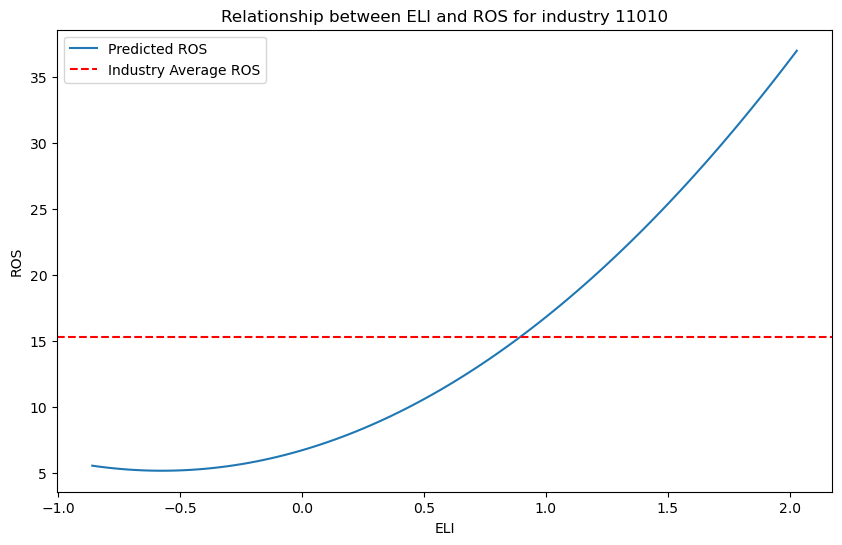

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


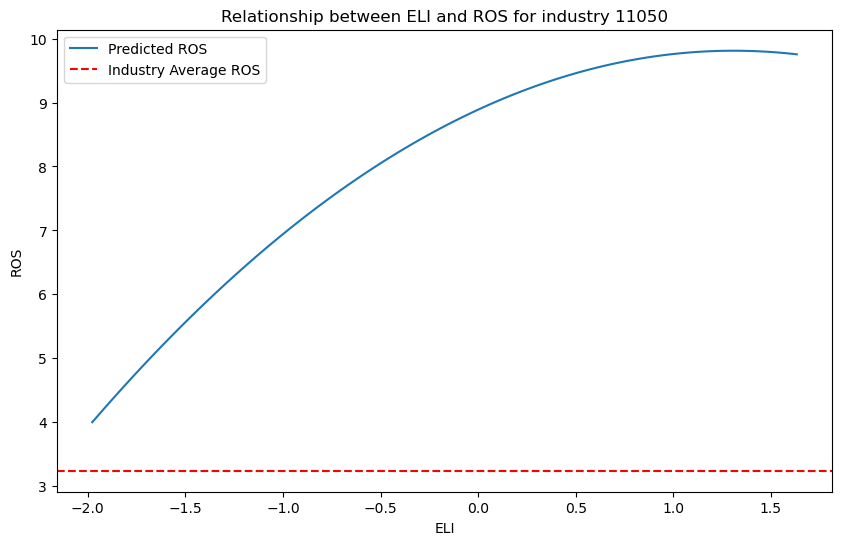

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


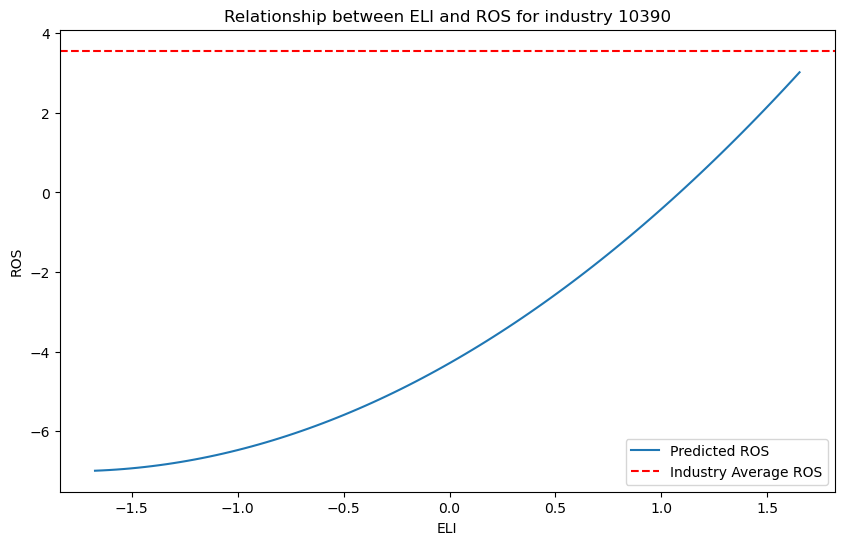

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


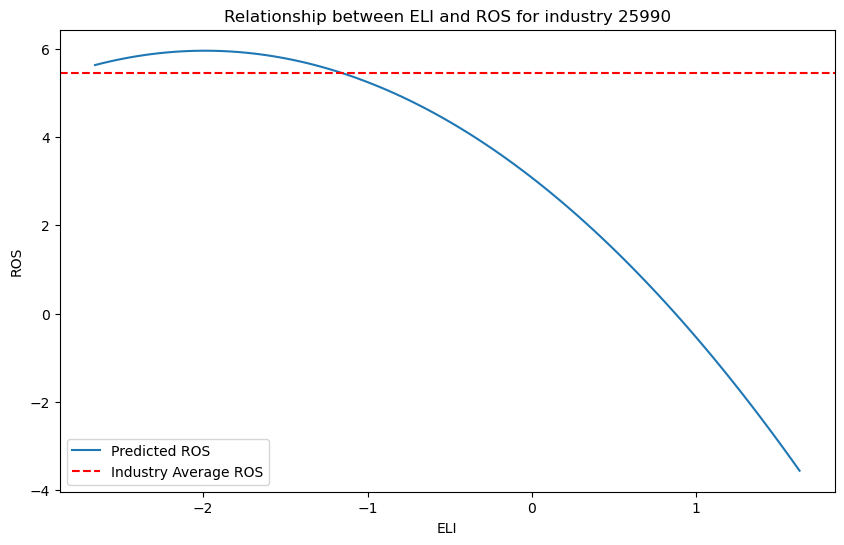

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


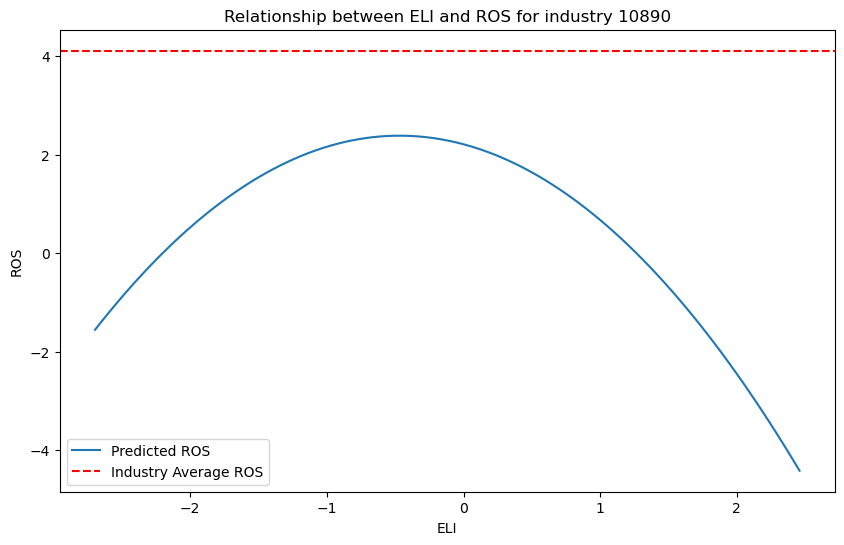

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


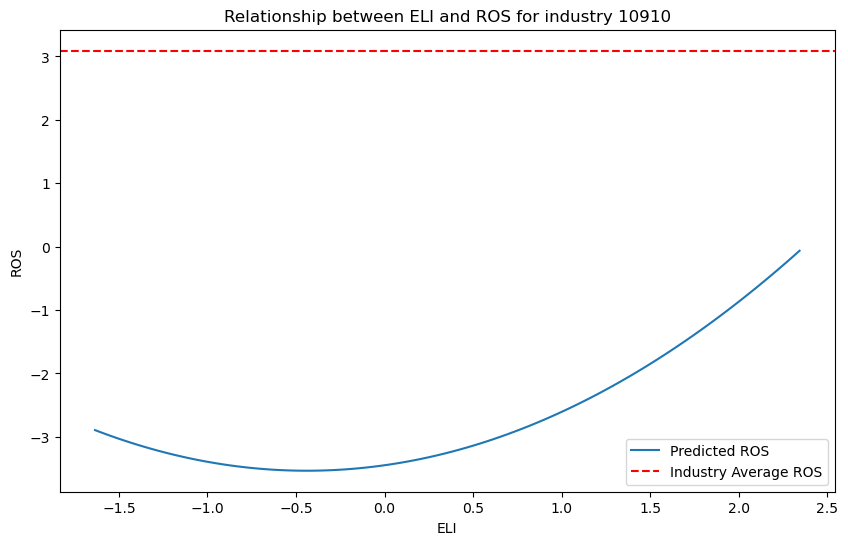

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


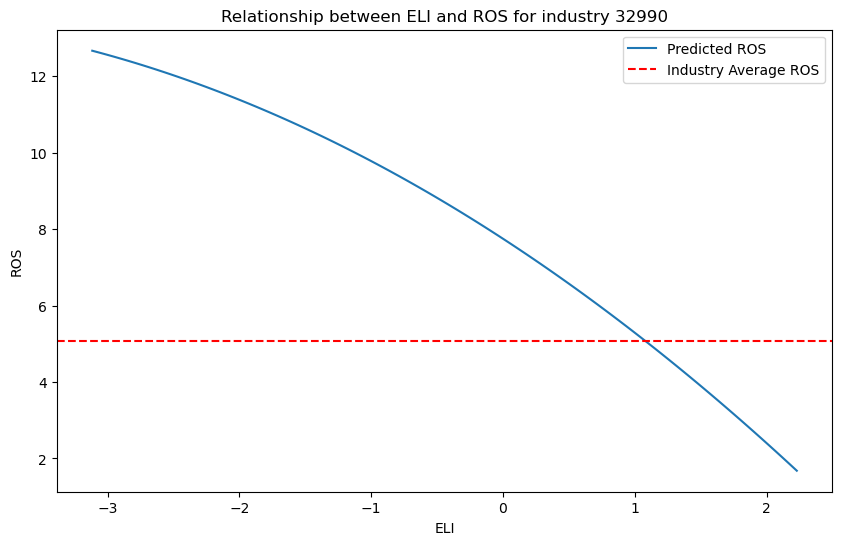

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


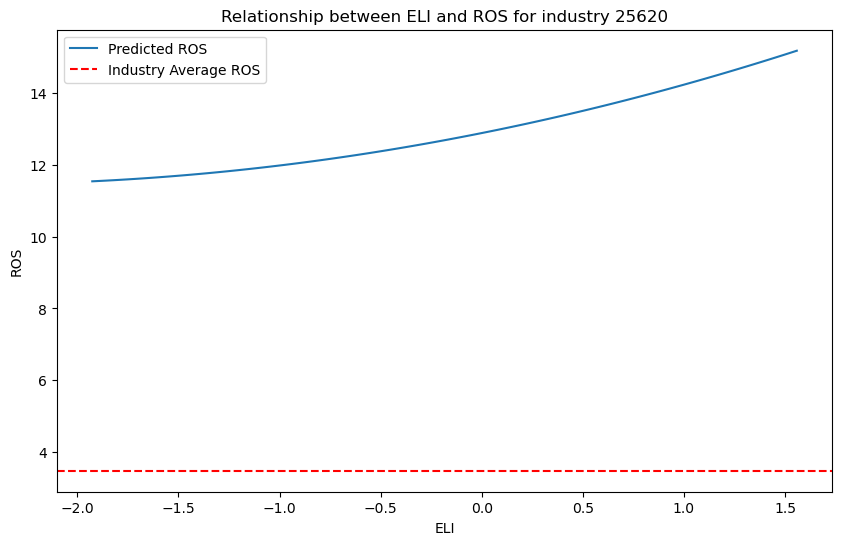

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


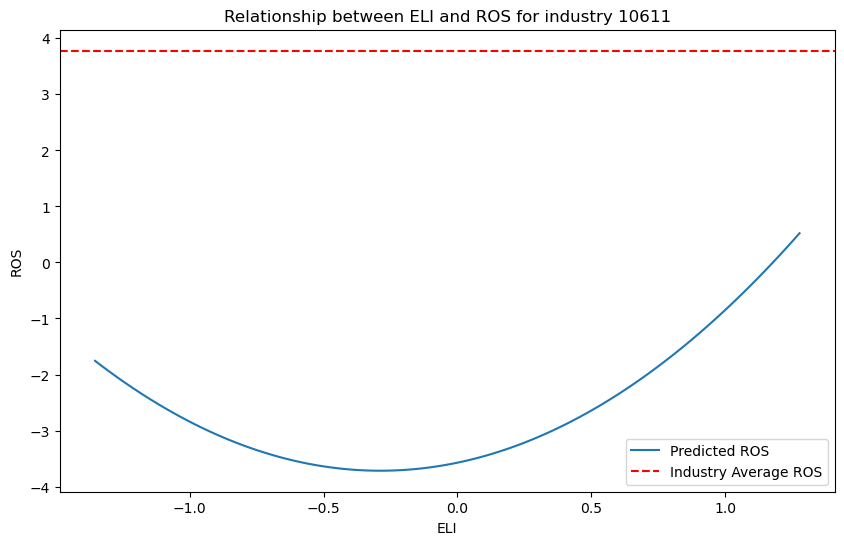

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


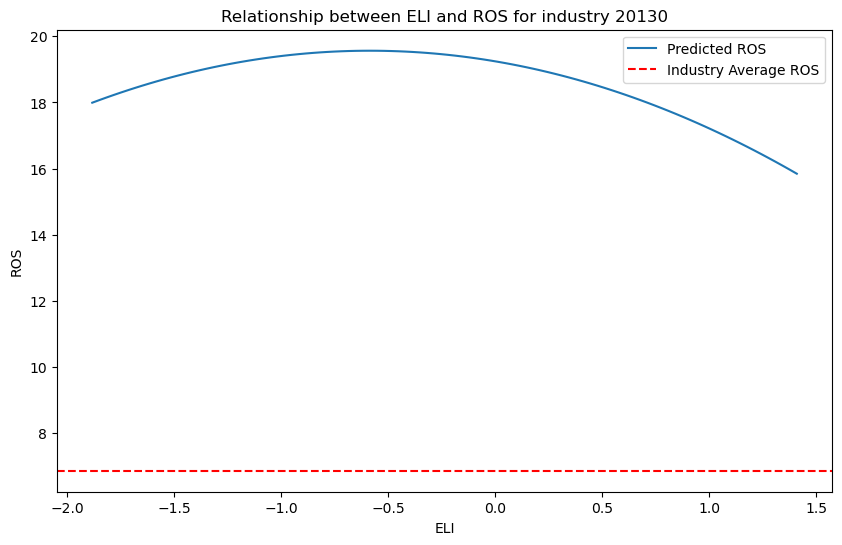

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


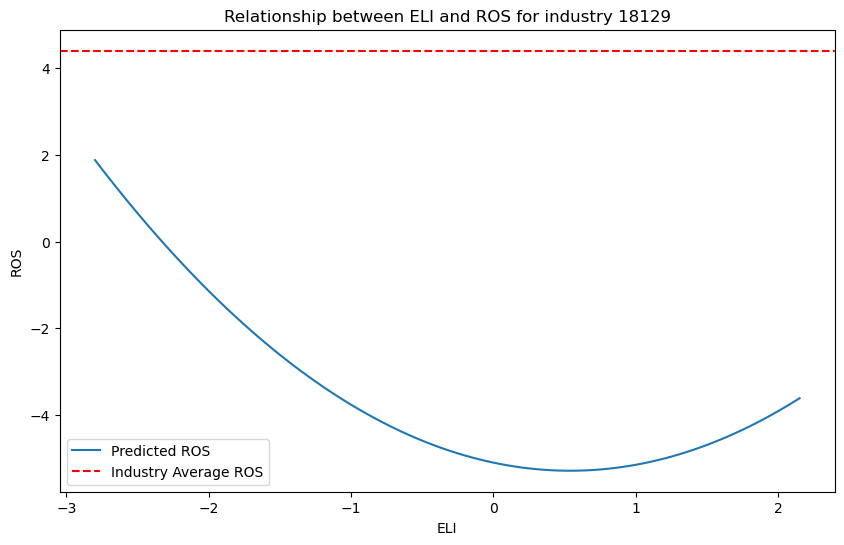

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


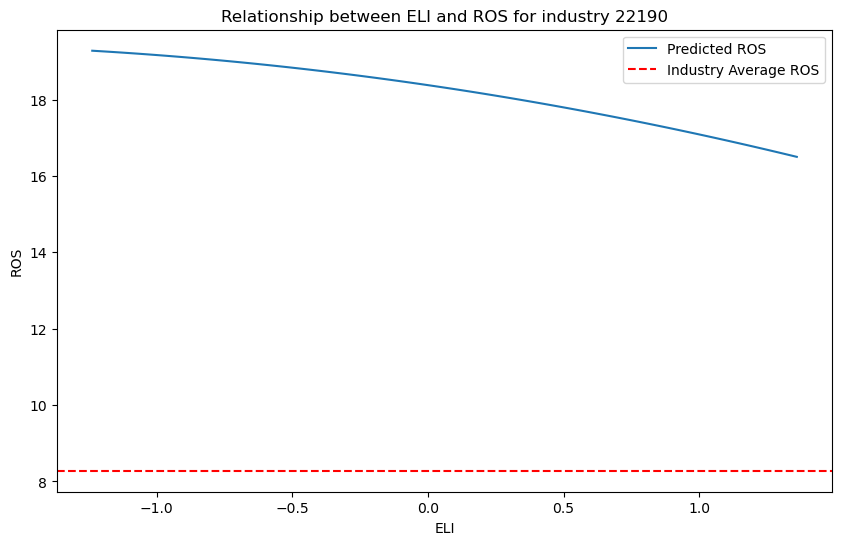

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


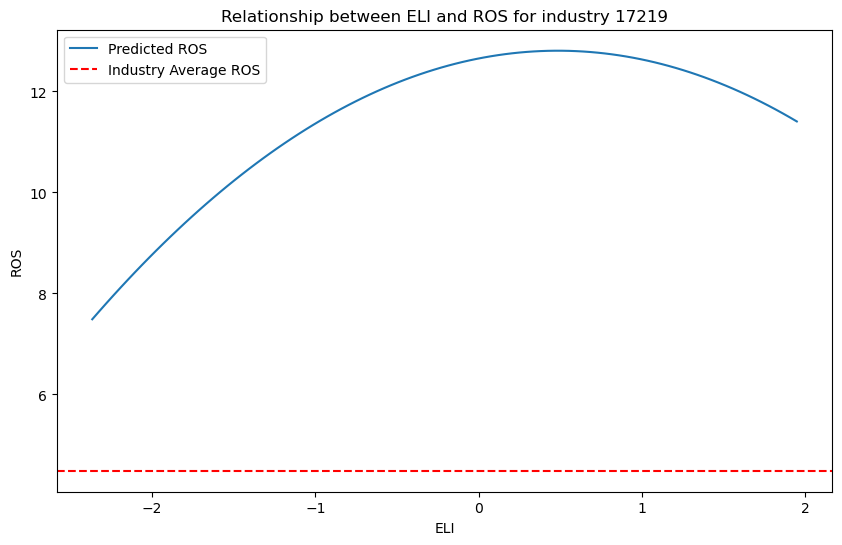

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


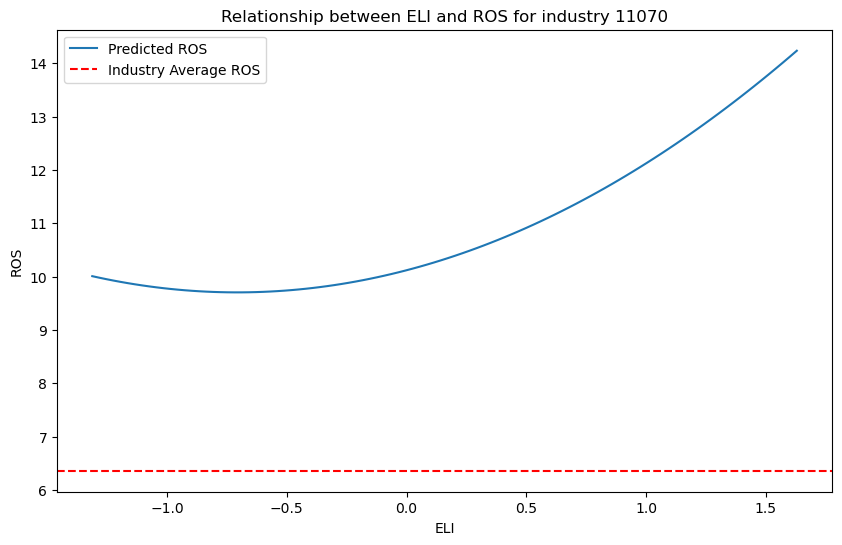

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


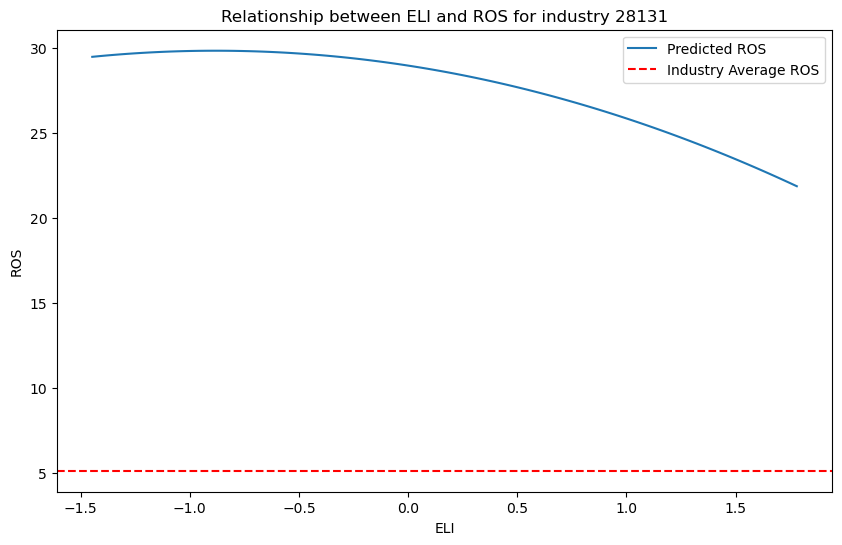

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


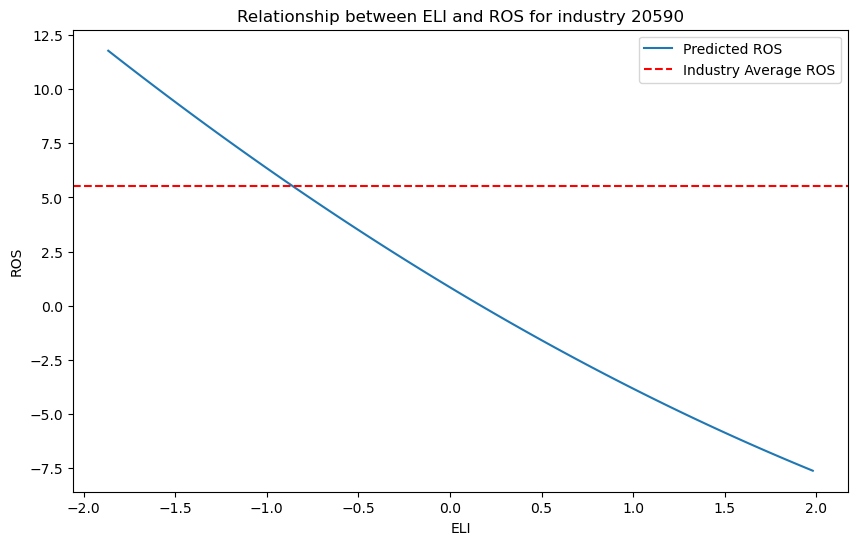

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


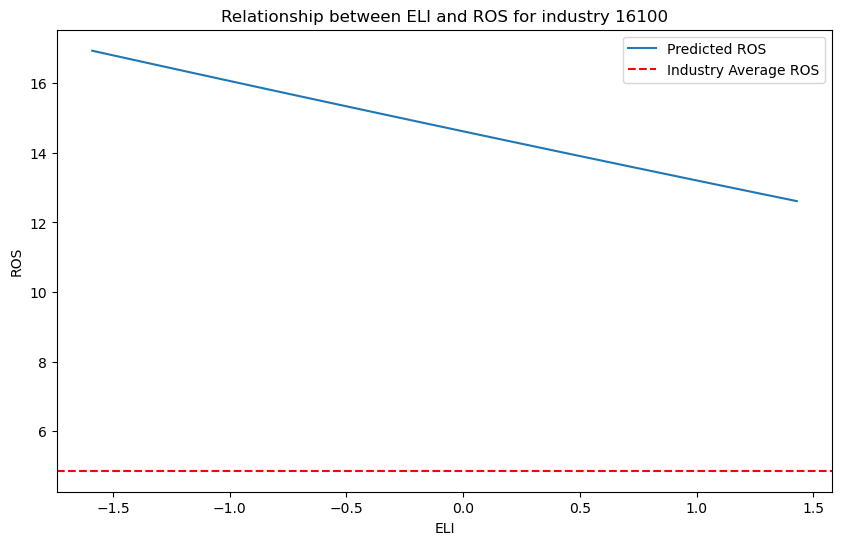

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


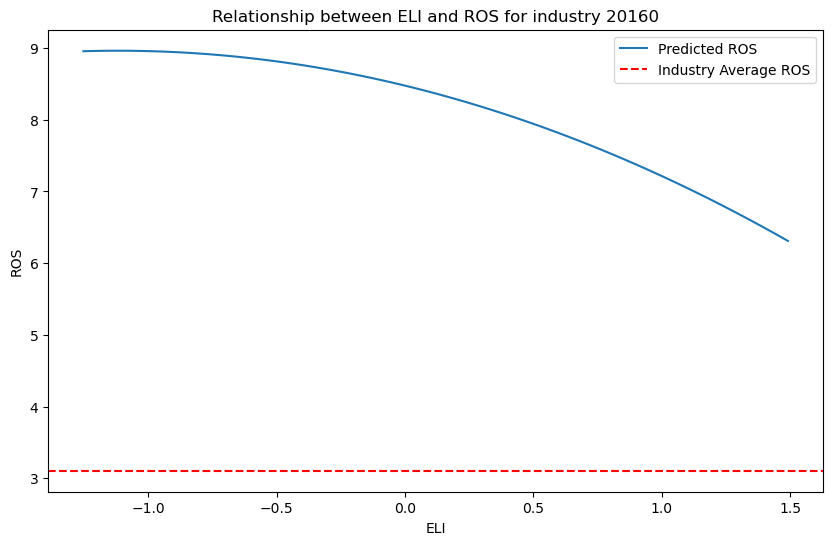

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


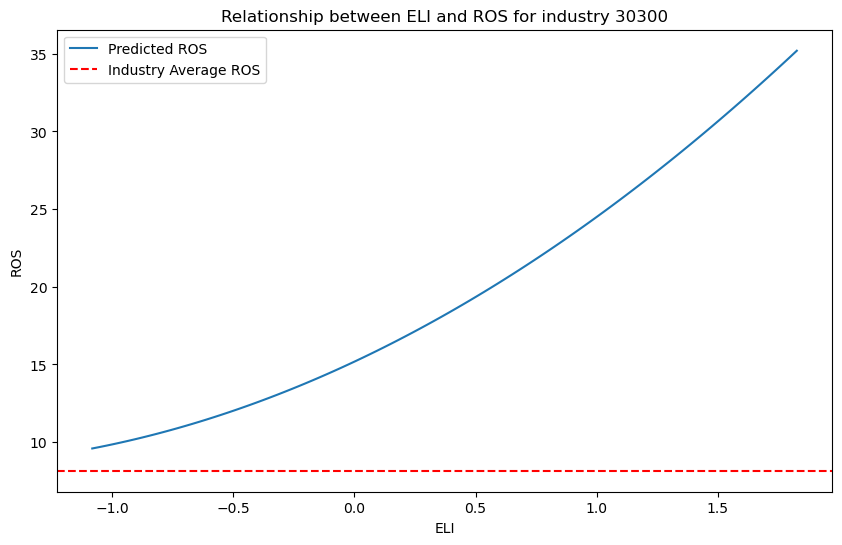

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


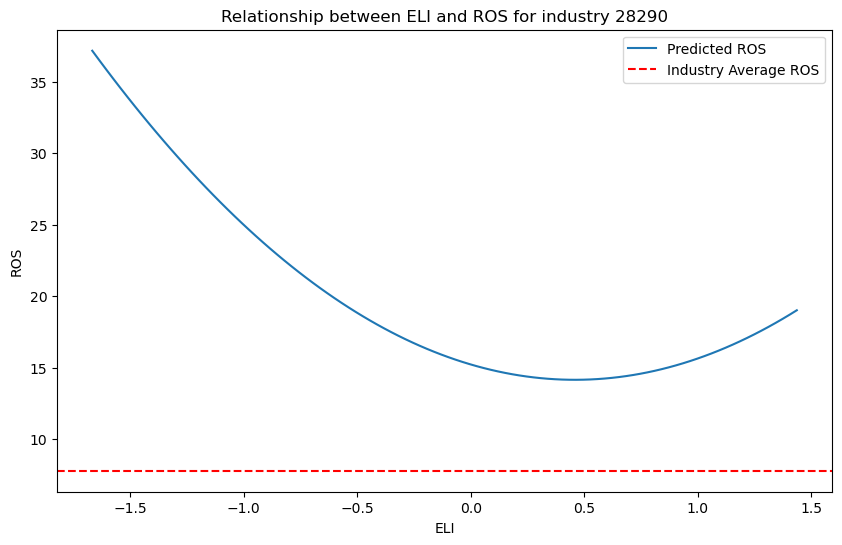

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


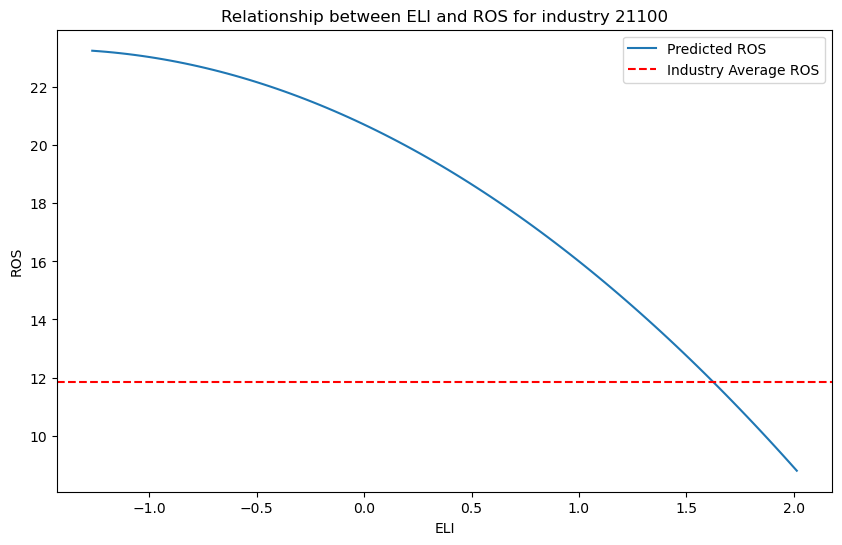

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


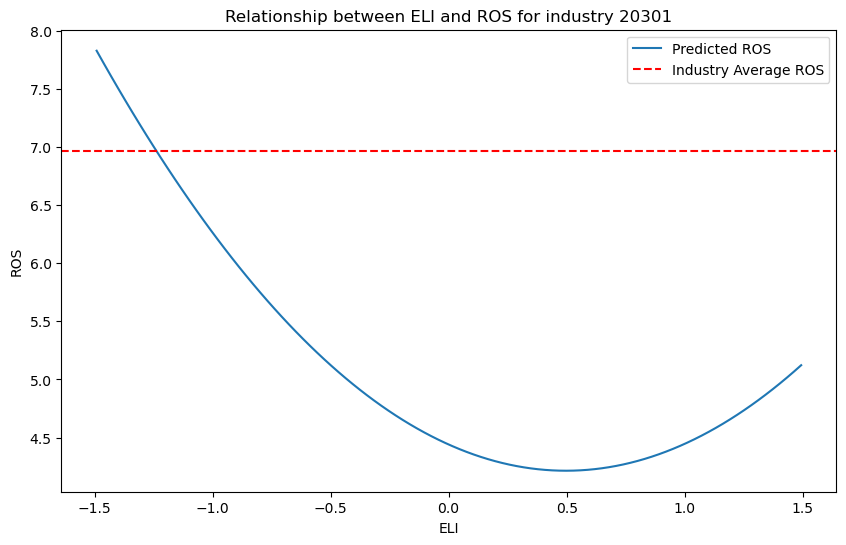

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


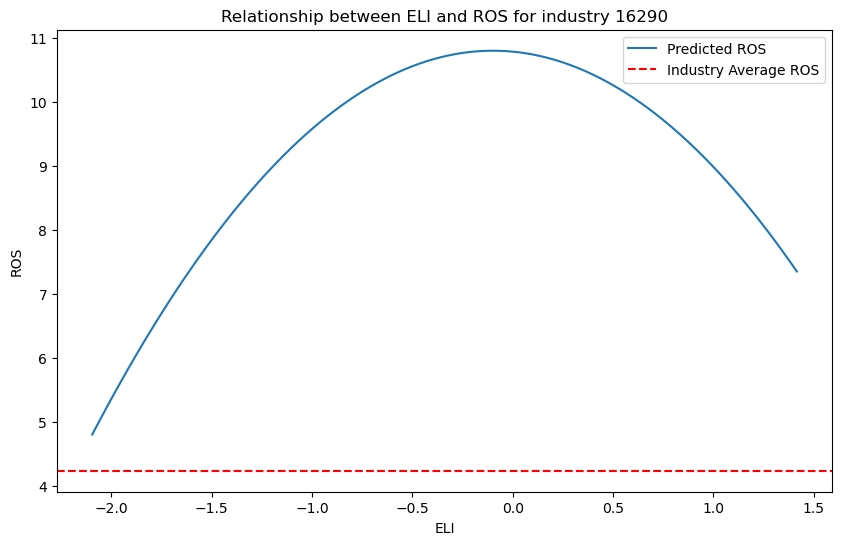

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


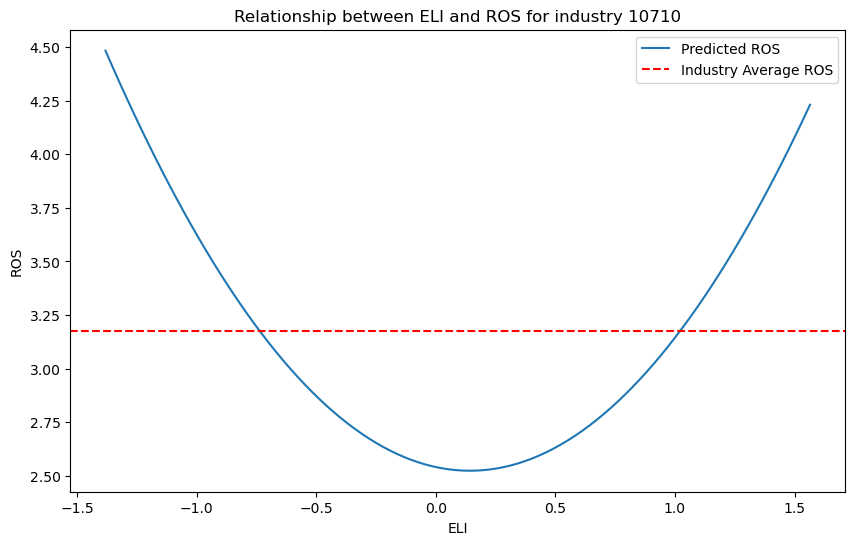

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


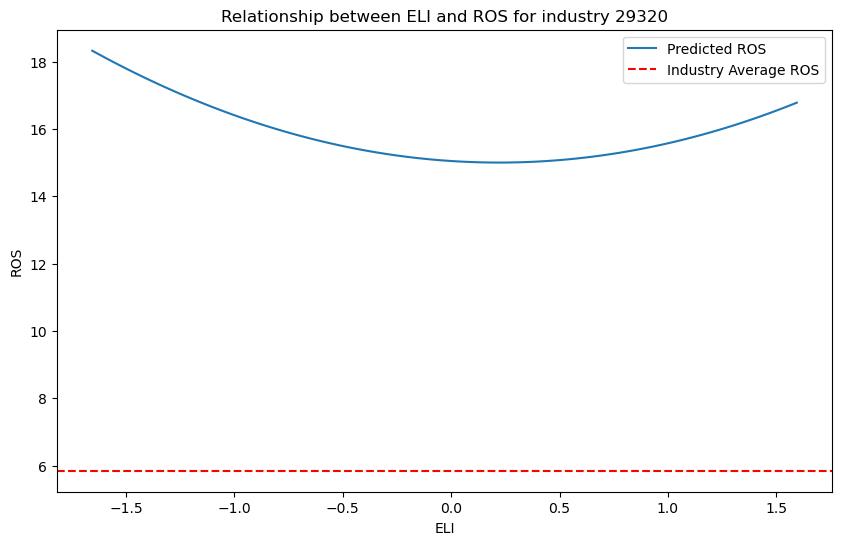

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


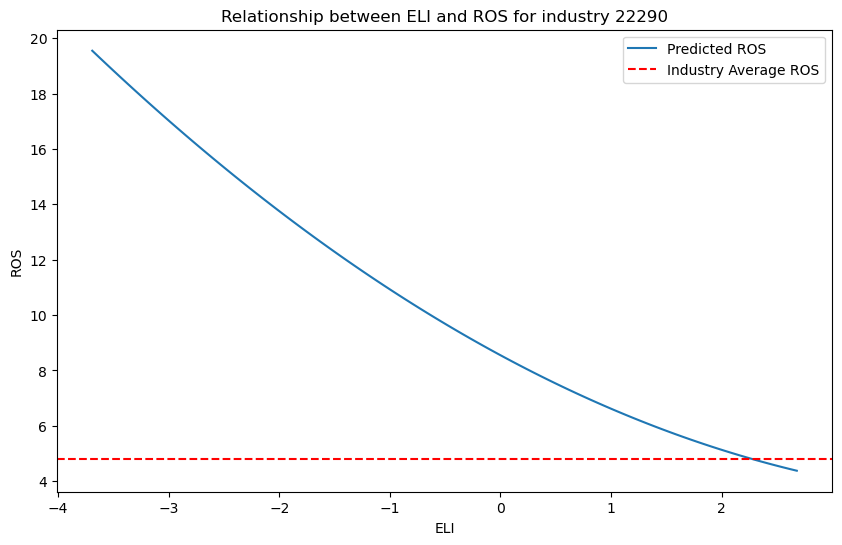

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


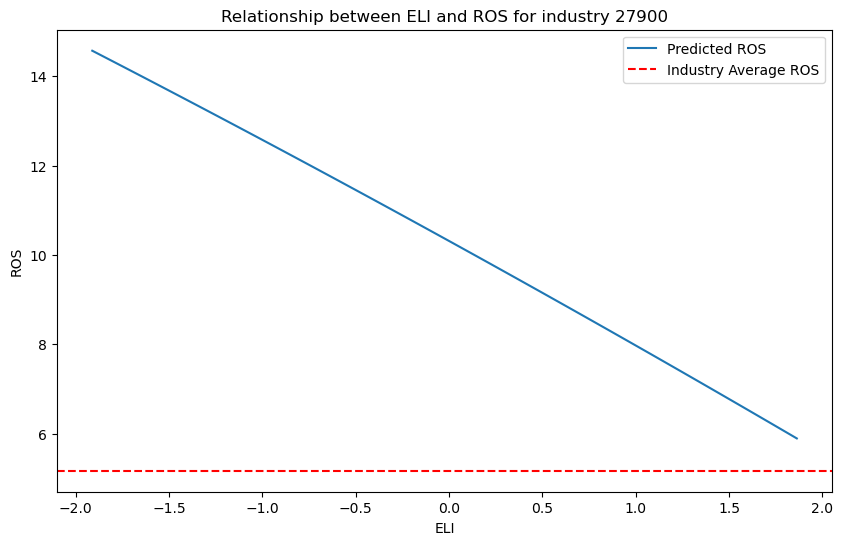

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


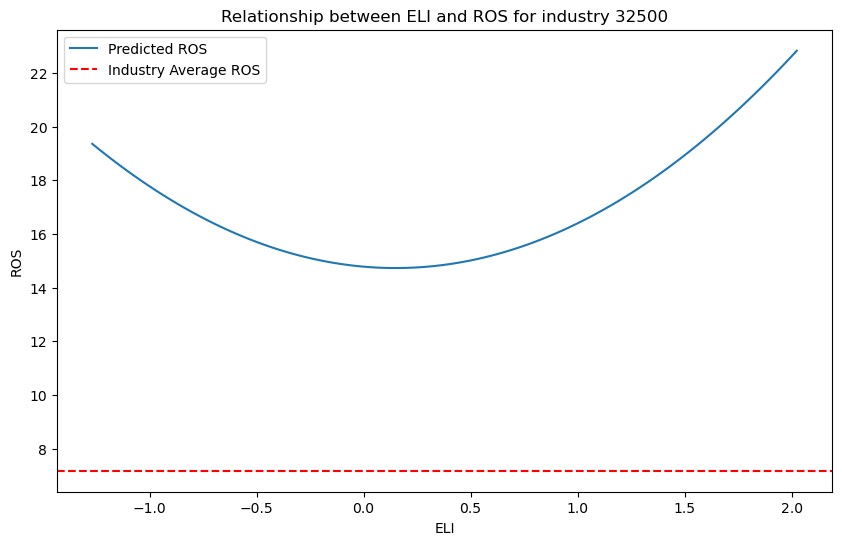

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


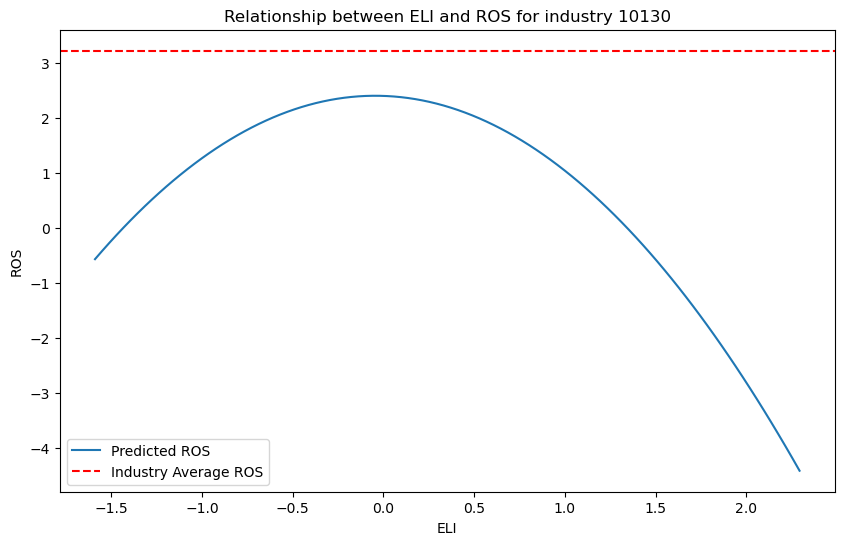

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


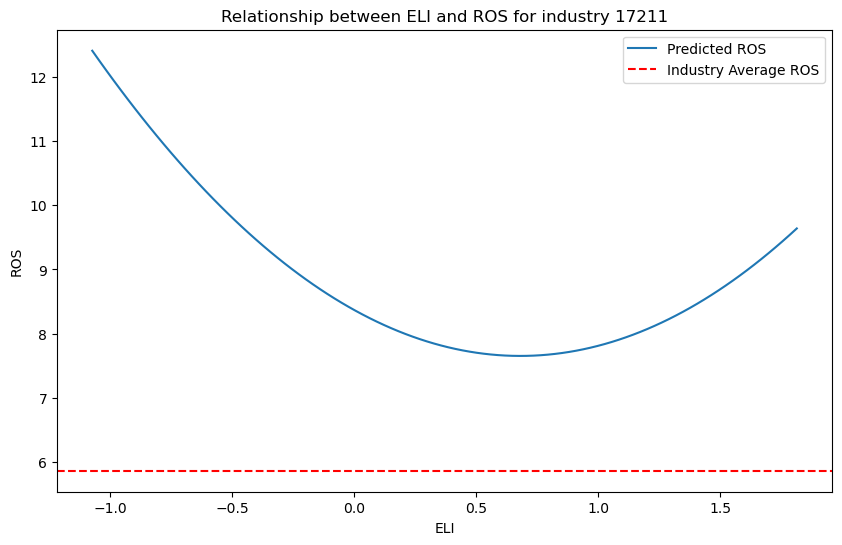

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


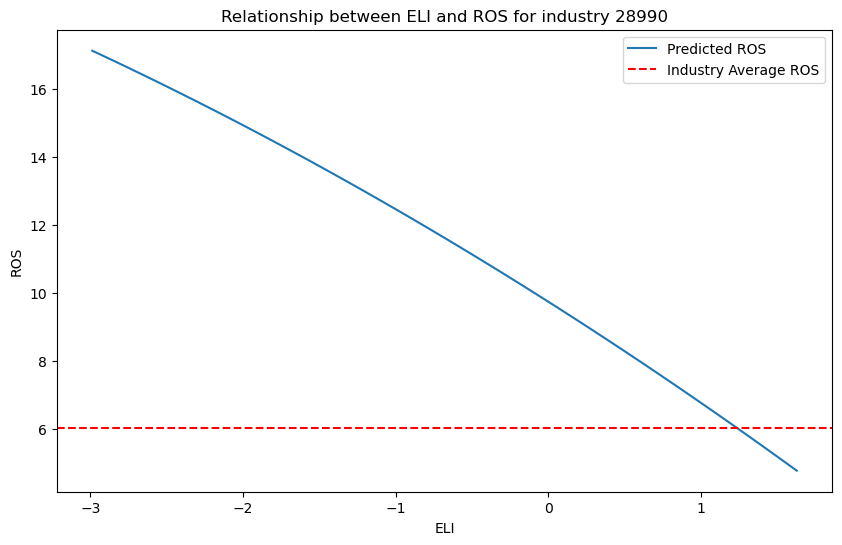

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


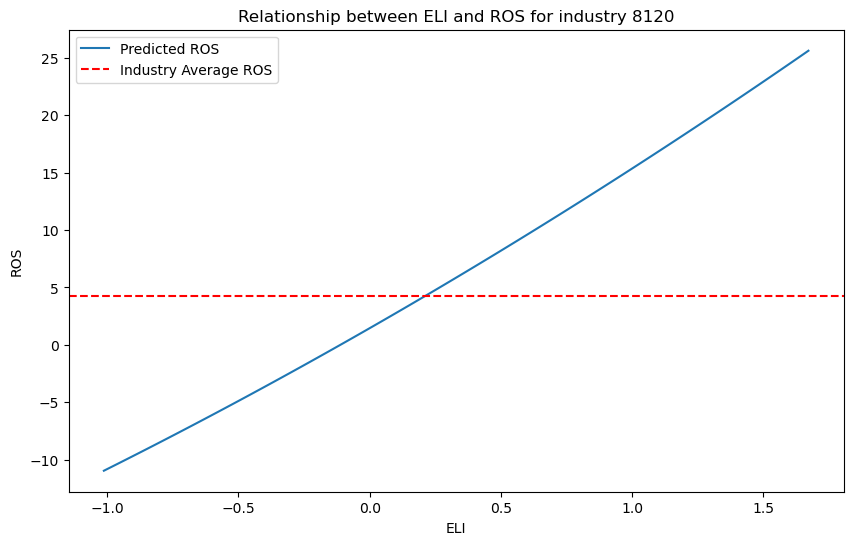

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


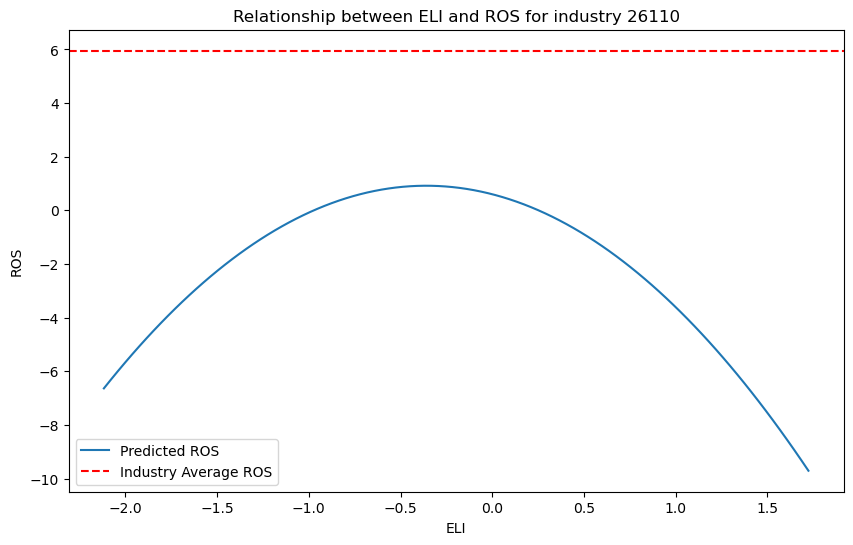

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


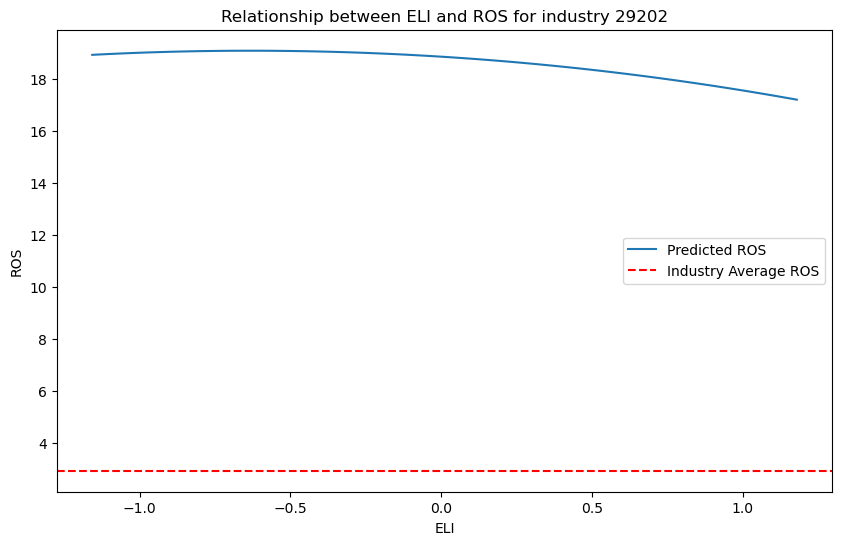

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


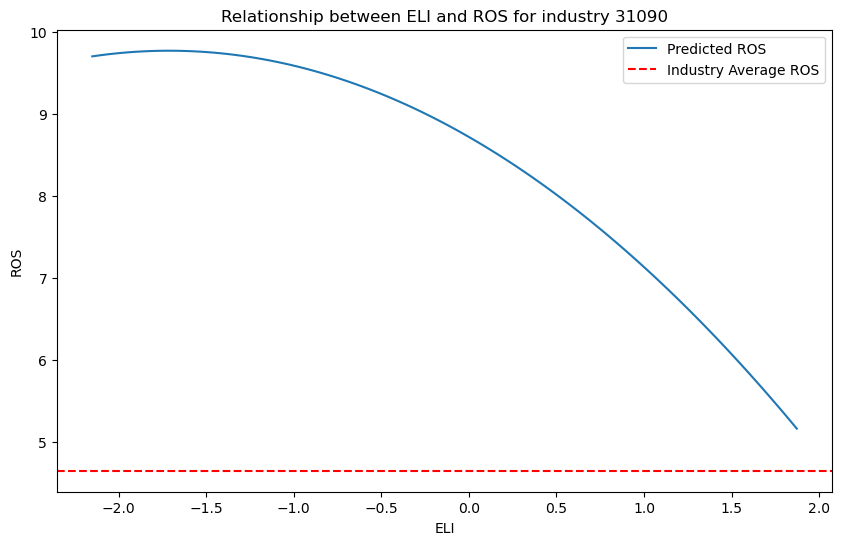

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


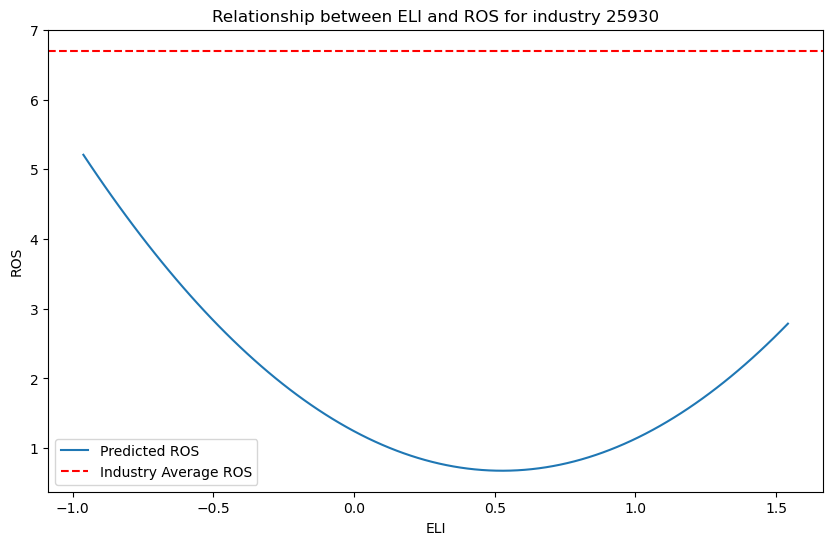

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


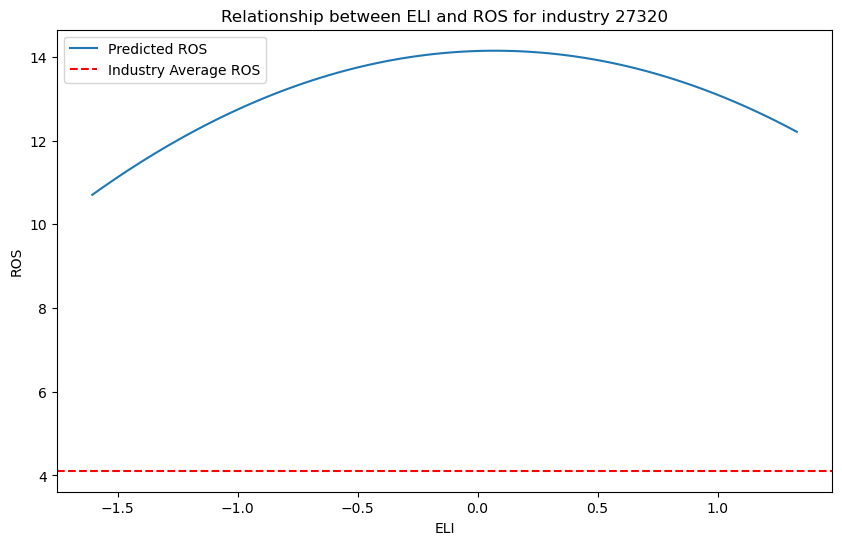

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


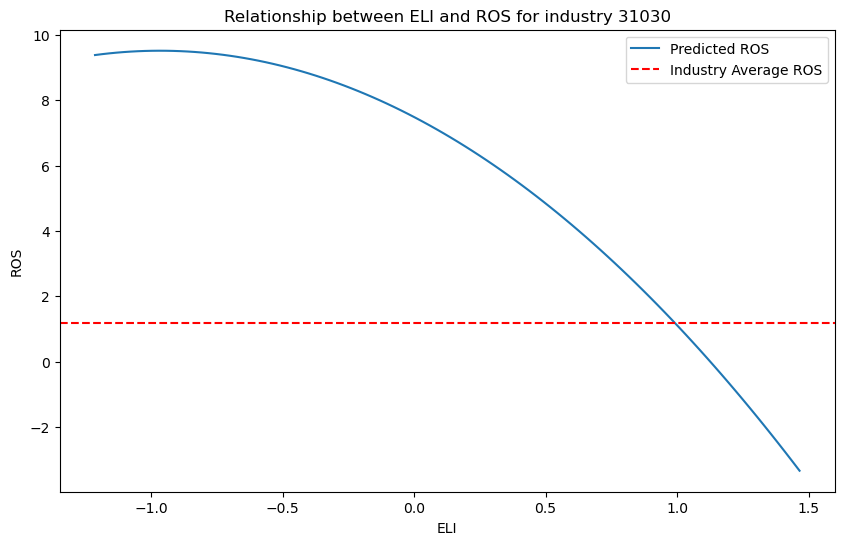

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


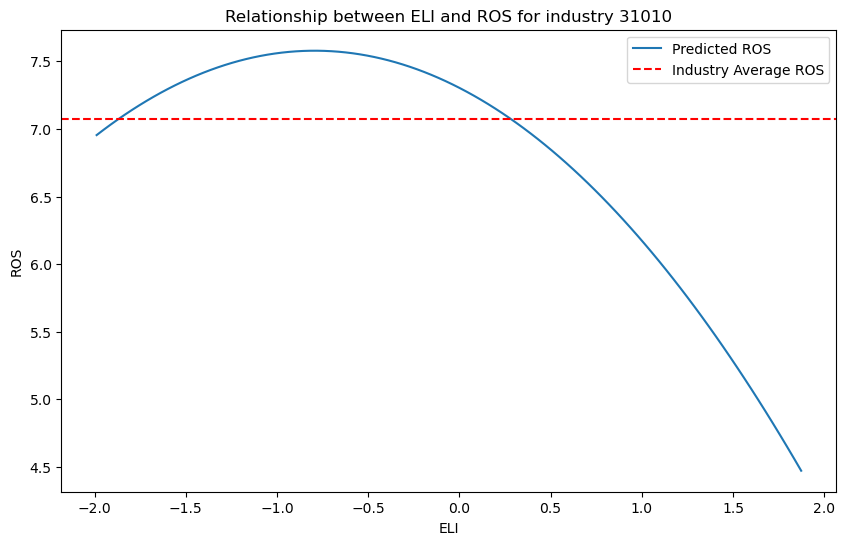

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


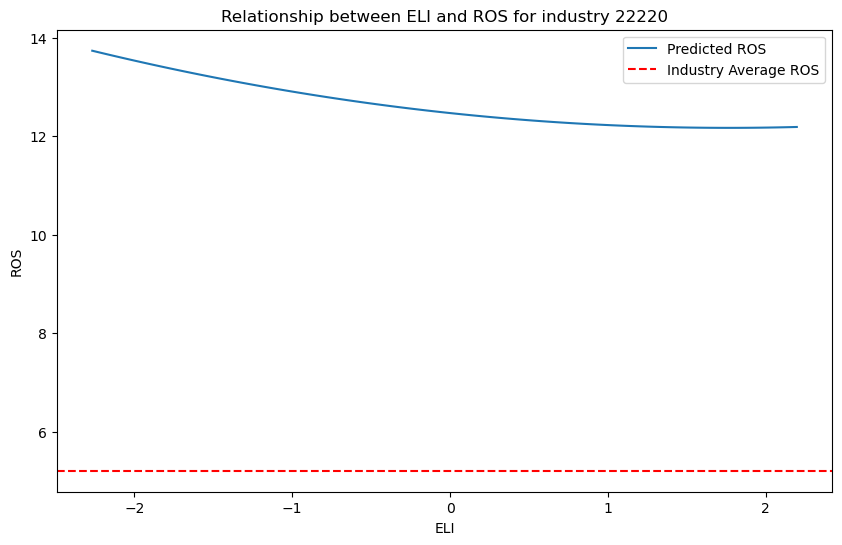

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


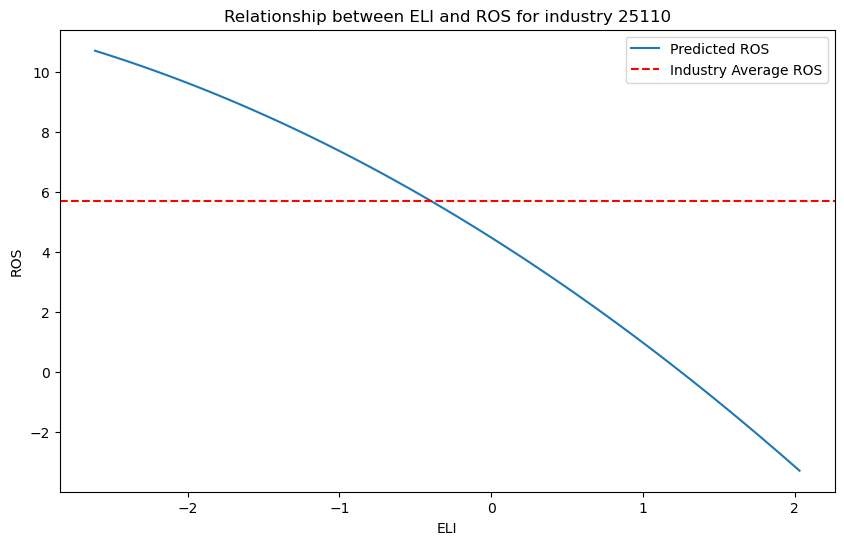

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


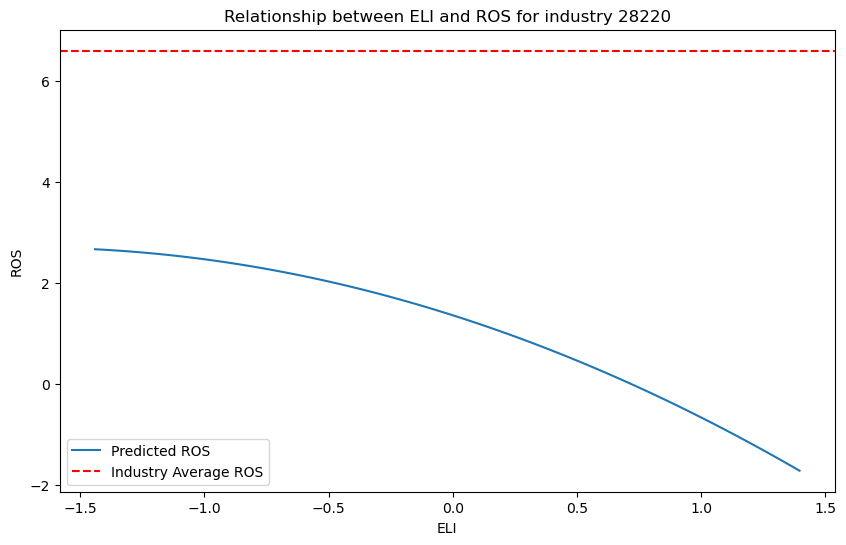

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


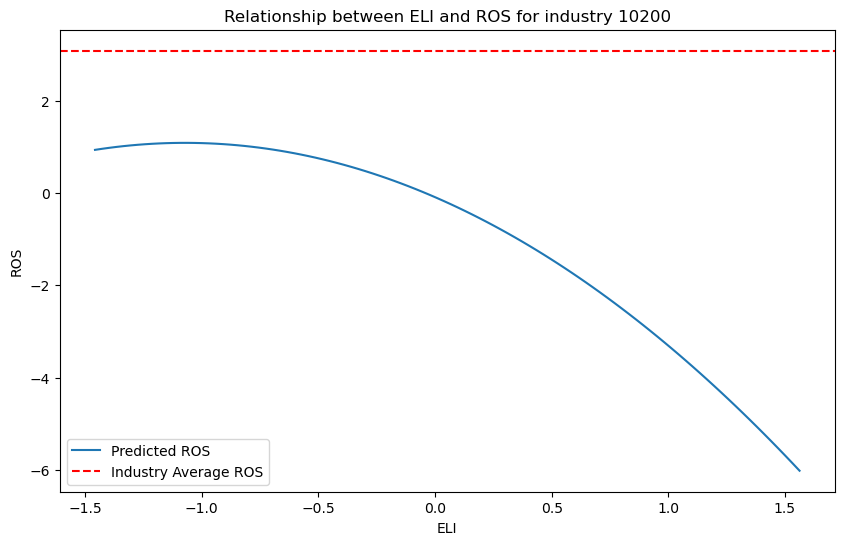

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


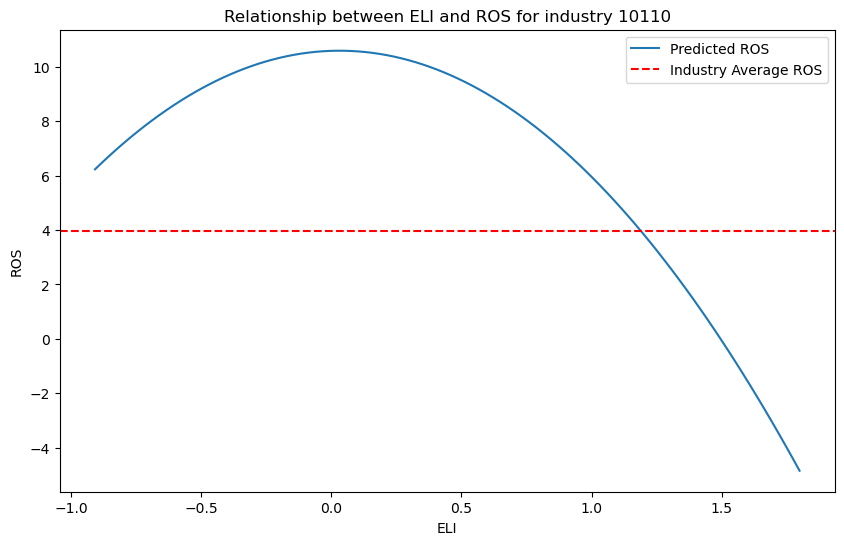

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


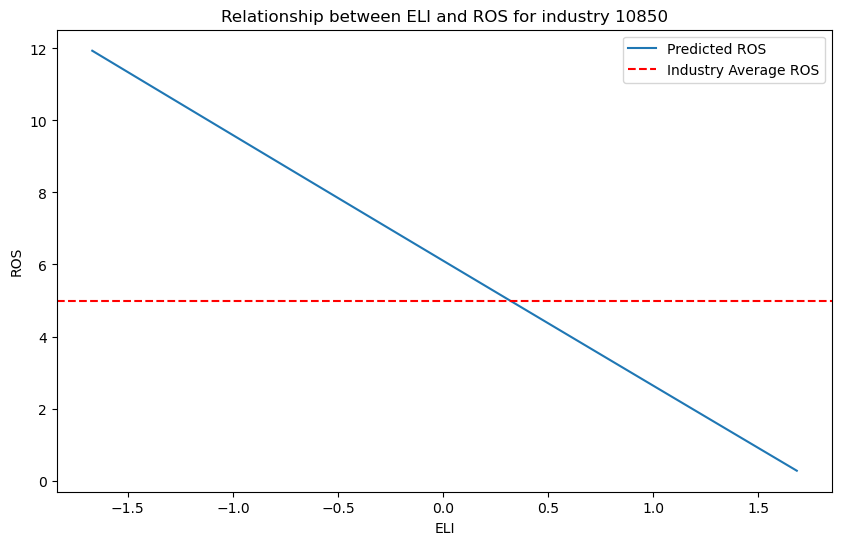

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


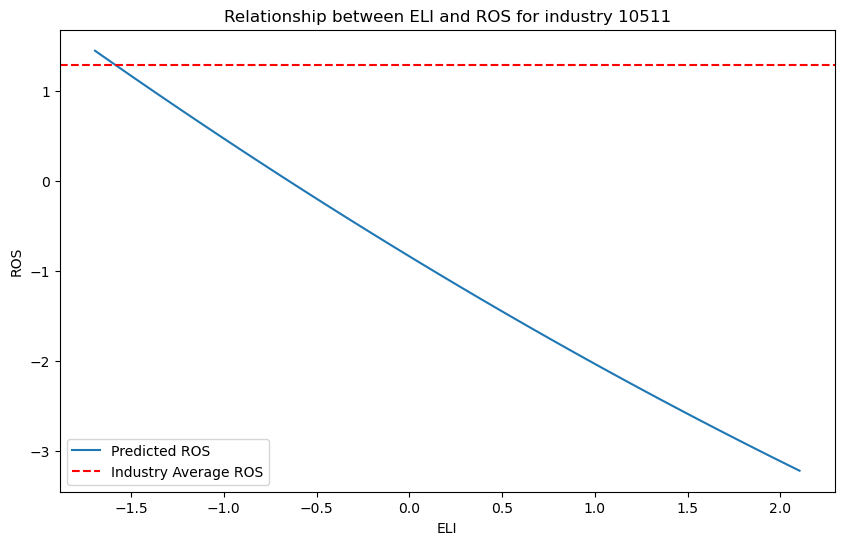

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


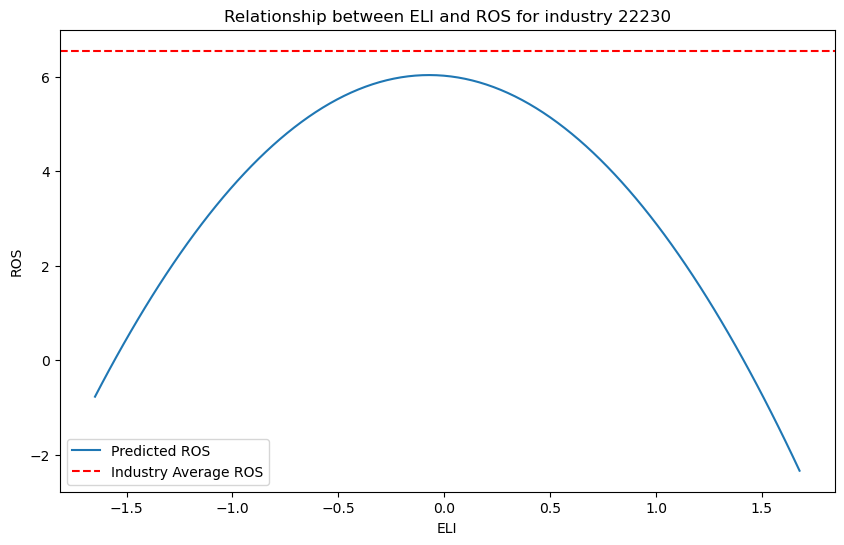

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


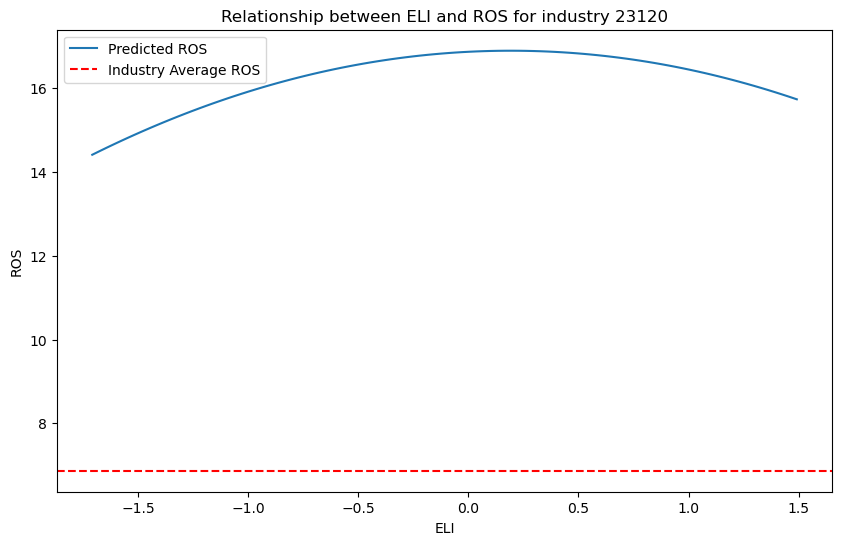

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


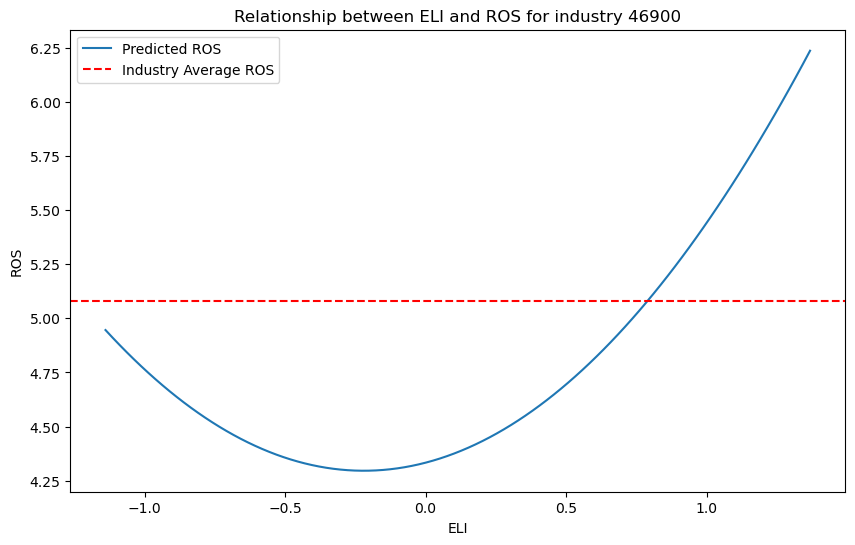

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/2754425029.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


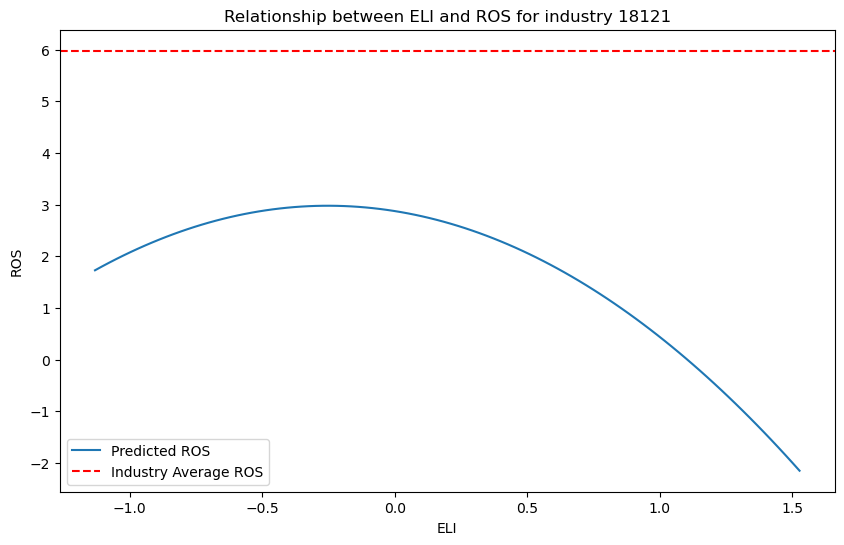

    Industry   ELI_coef  ELI_square_coef  ELI_pvalue  ELI_square_pvalue  \
0    11010.0   5.395771         4.691000    0.093887           0.182480   
1    11050.0   1.409175        -0.538592    0.215507           0.519365   
2    10390.0   3.029905         0.844990    0.025106           0.274537   
3    25990.0  -2.894055        -0.727344    0.000004           0.034520   
4    10890.0  -0.744129        -0.794390    0.140432           0.003526   
5    10910.0   0.393619         0.448015    0.545170           0.226205   
6    32990.0  -2.244551        -0.213998    0.000004           0.312353   
7    25620.0   1.124332         0.221853    0.303125           0.775127   
8    10611.0   0.997049         1.729104    0.599063           0.332901   
9    20130.0  -1.094212        -0.933561    0.356413           0.405642   
10   18129.0  -0.693912         0.644526    0.154812           0.015160   
11   22190.0  -1.039426        -0.251225    0.177376           0.724044   
12   17219.0   0.633844  

In [282]:
# Create an empty DataFrame to store the regression results
results_df = pd.DataFrame(columns=['Industry', 'ELI_coef', 'ELI_square_coef', 'ELI_pvalue', 'ELI_square_pvalue', 'Industry_avg_ROS', 'Max_ROS', 'ELI_at_Max_ROS','R2'])
df.reset_index(inplace= True)

df.set_index(['PrimaryUKSIC2007code', 'Index1'], inplace=True)

industry_codes = df.index.get_level_values('PrimaryUKSIC2007code').unique()
exog_vars = ['ELI','ELI_square','Firm_growth', 'Financial_leverage', 'Liquidity','Short_term_financing']


# Loop over industry codes
for code in industry_codes:
    # Subset DataFrame for the current industry
    df_subset = df[df.index.get_level_values('PrimaryUKSIC2007code') == code]
    
    # Reset the index and set a new MultiIndex with 'Company_name' and 'Index1'
    df_subset.reset_index(inplace=True)
    df_subset.set_index(['Company_name', 'Index1'], inplace=True)
    
    # Run the regression
    exog = sm.add_constant(df_subset[exog_vars])
    mod = PanelOLS(df_subset['ROS'], exog, entity_effects=True, time_effects=True)
    res = mod.fit()
    
    # Calculate the industry average ROS
    industry_avg_ros = df_subset['ROS'].mean()
    
    # Calculate the ELI value that maximizes ROS
    eli_at_max_ros = -res.params['ELI'] / (2 * res.params['ELI_square'])
    
    # Calculate the maximum ROS
    max_ros = res.params['const'] + res.params['ELI']*eli_at_max_ros + res.params['ELI_square']*eli_at_max_ros**2
    
    # Store the regression results in the DataFrame
    results_df = results_df.append({
    'Industry': code,
    'ELI_coef': res.params['ELI'],
    'ELI_square_coef': res.params['ELI_square'],
    'ELI_pvalue': res.pvalues['ELI'],
    'ELI_square_pvalue': res.pvalues['ELI_square'],
    'Industry_avg_ROS': industry_avg_ros,
    'Max_ROS': max_ros,
    'ELI_at_Max_ROS': eli_at_max_ros,
    'R2': res.rsquared}, ignore_index=True)
    
    
    # Generate a range of ELI values
    eli_values = np.linspace(df_subset['ELI'].min(), df_subset['ELI'].max(), 100)

    # Calculate predicted ROS values based on the regression results
    predicted_ros = res.params['const'] + res.params['ELI']*eli_values + res.params['ELI_square']*eli_values**2

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(eli_values, predicted_ros, label='Predicted ROS')
    plt.axhline(y=industry_avg_ros, color='r', linestyle='--', label='Industry Average ROS')
    plt.xlabel('ELI')
    plt.ylabel('ROS')
    plt.title(f'Relationship between ELI and ROS for industry {code}')
    plt.legend()
    plt.show()

# Print the DataFrame with the regression results
print(results_df)


In [283]:
import pandas as pd

# Create a DataFrame for the categories
categories_df = pd.DataFrame(columns=[
    'Category', 'Number_of_Industries', 'Avg_Beta_ELI', 'Avg_Beta_ELIsquare', 'Avg_R2'
])

# Introducing a threshold to consider a coefficient zero
threshold = 1e-6

# Dictionary to hold intermediary results
categories = {
    'ELI_0_ELIsquare_0': [],
    'ELI_positive_ELIsquare_0': [],
    'ELI_negative_ELIsquare_0': [],
    'U_shaped': [],
    'ELI_0_ELIsquare_negative': [],
    'ELI_negative_ELIsquare_negative': [],
    'ELI_positive_ELIsquare_positive': [],
    'ELI_negative_ELIsquare_positive': [],
    'ELI_0_ELIsquare_positive': []
}

# Categorise based on the coefficients
for index, row in results_df.iterrows():
    if abs(row['ELI_coef']) < threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_0_ELIsquare_0'].append(row)
    elif row['ELI_coef'] > threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_positive_ELIsquare_0'].append(row)
    elif row['ELI_coef'] < -threshold and abs(row['ELI_square_coef']) < threshold:
        categories['ELI_negative_ELIsquare_0'].append(row)
    elif row['ELI_coef'] > threshold and row['ELI_square_coef'] < -threshold:
        categories['U_shaped'].append(row)
    elif row['ELI_coef'] < -threshold and row['ELI_square_coef'] < -threshold:
        categories['ELI_negative_ELIsquare_negative'].append(row)
    elif abs(row['ELI_coef']) < threshold and row['ELI_square_coef'] < -threshold:
        categories['ELI_0_ELIsquare_negative'].append(row)
    elif row['ELI_coef'] > threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_positive_ELIsquare_positive'].append(row)
    elif row['ELI_coef'] < -threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_negative_ELIsquare_positive'].append(row)
    elif abs(row['ELI_coef']) < threshold and row['ELI_square_coef'] > threshold:
        categories['ELI_0_ELIsquare_positive'].append(row)

# Compute the required statistics and populate the categories_df
for key, rows in categories.items():
    avg_beta_eli = sum([row['ELI_coef'] for row in rows]) / len(rows) if rows else 0
    avg_beta_elisquare = sum([row['ELI_square_coef'] for row in rows]) / len(rows) if rows else 0
    avg_r2 = sum([row['R2'] for row in rows]) / len(rows) if rows else 0
    
    categories_df = categories_df.append({
        'Category': key,
        'Number_of_Industries': len(rows),
        'Avg_Beta_ELI': avg_beta_eli,
        'Avg_Beta_ELIsquare': avg_beta_elisquare,
        'Avg_R2': avg_r2
    }, ignore_index=True)

    #Print the datframe
print(categories_df)

categories_df.to_excel("ELI and ROS_category results.xlsx", index=False)

                          Category Number_of_Industries Avg_Beta_ELI  \
0                ELI_0_ELIsquare_0                    0            0   
1         ELI_positive_ELIsquare_0                    0            0   
2         ELI_negative_ELIsquare_0                    0            0   
3                         U_shaped                    5     0.558973   
4         ELI_0_ELIsquare_negative                    0            0   
5  ELI_negative_ELIsquare_negative                   22    -1.669244   
6  ELI_positive_ELIsquare_positive                    9     3.653066   
7  ELI_negative_ELIsquare_positive                   14    -1.830393   
8         ELI_0_ELIsquare_positive                    0            0   

  Avg_Beta_ELIsquare    Avg_R2  
0                  0         0  
1                  0         0  
2                  0         0  
3          -1.609564  0.174937  
4                  0         0  
5          -0.940015  0.278522  
6           1.372028   0.21965  
7           1.0

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/4216898331.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/4216898331.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/4216898331.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append({
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_8595/4216898331.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df =

In [284]:
results_df.columns

Index(['Industry', 'ELI_coef', 'ELI_square_coef', 'ELI_pvalue',
       'ELI_square_pvalue', 'Industry_avg_ROS', 'Max_ROS', 'ELI_at_Max_ROS',
       'R2'],
      dtype='object')

In [285]:
# Create a DataFrame with rows where both p-values are less than 0.2
significant_results_df = results_df[(results_df['ELI_pvalue'] <= 0.2) & (results_df['ELI_square_pvalue'] <= 0.2)]

# Print the DataFrame
significant_results_df

Industry  ELI_coef  ELI_square_coef  ELI_pvalue  ELI_square_pvalue  \
0    11010.0  5.395771         4.691000    0.093887           0.182480   
3    25990.0 -2.894055        -0.727344    0.000004           0.034520   
4    10890.0 -0.744129        -0.794390    0.140432           0.003526   
10   18129.0 -0.693912         0.644526    0.154812           0.015160   
19   28290.0 -4.671271         5.092712    0.043971           0.005272   
29   17211.0 -2.109326         1.548718    0.004122           0.025650   
32   26110.0 -1.762545        -2.447581    0.031296           0.000789   
35   25930.0 -2.154278         2.046279    0.159292           0.124221   
38   31010.0 -0.693414        -0.437030    0.010614           0.127116   

    Industry_avg_ROS    Max_ROS  ELI_at_Max_ROS        R2  
0          15.317545   5.182563       -0.575119  0.215048  
3           5.446142   5.961918       -1.989468  0.254444  
4           4.113298   2.386827       -0.468365  0.126670  
10          4.406522  -5.293211        0.538312  0.114556  
19          7.802540  14.159606        0.458623  0.380607  
29          5.860766   7.651387        0.680991  0.358848  
32          5.953679   0.919084       -0.360059  0.212216  
35          6.701501   0.675891        0.526389  0.362712  
38          7.069936   7.578786       -0.793326  0.527240

In [287]:
optimal_result=results_df[(results_df['ELI_coef'] > 0) & (results_df['ELI_square_coef'] < 0)]
optimal_result.to_excel('performance_ros.xlsx')